# Telecom Churn Case Study

1. Data Reading and Understanding.
2. Data Cleaning and EDA
3. Data Preprocessing.
4. Modeling.
5. Recommendations.

## 1.Data Reading and Understanding

In [1]:
#importing libraries
import numpy as np , pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',200)

In [5]:
df = pd.read_csv('telecom_churn_data.csv')
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [6]:
len(df.mobile_number.unique())

99999

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [8]:
df.shape

(99999, 226)

In [9]:
df.describe(include='object')

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
count                 99999                99398                98899   
unique                    1                    1                    1   
top               6/30/2014            7/31/2014            8/31/2014   
freq                  99999                99398                98899   

       last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
count                 98340               98392               98232   
unique                    1                  30                  31   
top               9/30/2014           6/30/2014           7/31/2014   
freq                  98340               16960               17288   

       date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
count                96377               95239                    25153   
unique                  31                  30                       30   
top              8/31/2014           9/29/2014                6/30/2014   
freq                 14706               22623                     1888   

       date_of_last_rech_data_7 date_of_last_rech_data_8  \
count                     25571                    26339   
unique                       31                       31   
top                   7/31/2014                8/31/2014   
freq                       1813                     1998   

       date_of_last_rech_data_9  
count                     25922  
unique                       30  
top                   9/29/2014  
freq                       2329

## 2.Data Cleaning & Exploratory Data Analysis

### Filtering High Value Customers 

In [10]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] +df['total_rech_amt_7']) / 2
df.avg_rech_amt_6_7

0        307.0
1        229.0
2        241.5
3        270.0
4        273.0
         ...  
99994     85.0
99995    110.0
99996     59.5
99997    369.5
99998    355.0
Name: avg_rech_amt_6_7, Length: 99999, dtype: float64

In [11]:
bottom_70 = df.avg_rech_amt_6_7.quantile(.7)

- <b> Retaining only the top 30% of customers.

In [12]:
df = df[df['avg_rech_amt_6_7'] > bottom_70]
df.shape

(29979, 227)

In [13]:
to_drop = ['avg_rech_amt_6_7']

### Deriving Target Variable.

# Row-wise check...

In [14]:
month_9 = df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]
month_9.head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
7             0.00            0.00          0.0          0.0
8            34.91          142.18          0.0          0.0
13          631.86          446.09          0.0          0.0
16          334.56          255.74          0.0          0.0
17           87.13          631.08          0.0          0.0

In [15]:
df['Churn'] = (~month_9.any(axis=1)).map(lambda x : 1 if (x==True) else 0)

In [16]:
# df['Churn'] = df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

In [17]:
df.Churn

7        1
8        0
13       0
16       0
17       0
        ..
99970    0
99974    0
99986    0
99988    0
99997    0
Name: Churn, Length: 29979, dtype: int64

In [18]:
df.Churn.mean()*100

8.636045231662164

- <b>Dropping all the columns for september month.

In [19]:
to_drop.extend([x for x in df.columns if x[-2:]=='_9'])

In [20]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
13            9/30/2014   492.846   205.671   593.260  322.732       501.76   
16            9/30/2014   430.975   299.869   187.894  206.490        50.51   
17            9/30/2014   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
13       108.39       534.24       244.81        413.31        119.28   
16        74.01        70.61        31.34        296.29        229.74   
17         9.28         7.79       558.51         61.64          0.00   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
13        482.46        214.06          23.53         144.24          72.11   
16        162.76        224.39           0.00           2.83           0.00   
17          5.54         87.89           0.00           4.76           4.81   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7             NaN          23.74          12.59          38.06            NaN   
8            0.00           0.00           0.00           0.00           0.00   
13         136.78           7.98          35.26           1.44          12.78   
16           0.00           0.00          17.74           0.00           0.00   
17           0.00           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51    

## EDA

In [59]:
sns.set_theme(style='white')

In [68]:
def box(y):
    plt.figure(figsize=(14,5))
    plt.title('Box Plot of ' + y.name + ' vs ' + 'Churn',fontdict={'size':20,'family': 'serif'})
    sns.boxplot(x=df['Churn'],y=y)
    sns.despine(offset=10, trim=True)

In [69]:
df.select_dtypes(exclude='object').columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       ...
       'fb_user_7', 'fb_user_8', 'fb_user_9', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'avg_rech_amt_6_7', 'Churn'],
      dtype='object', length=216)

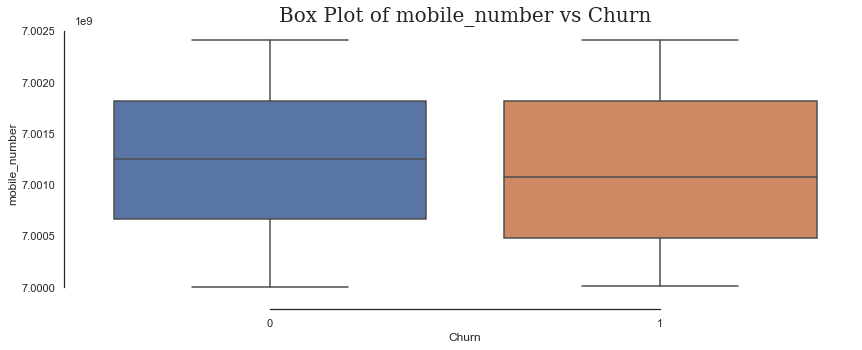

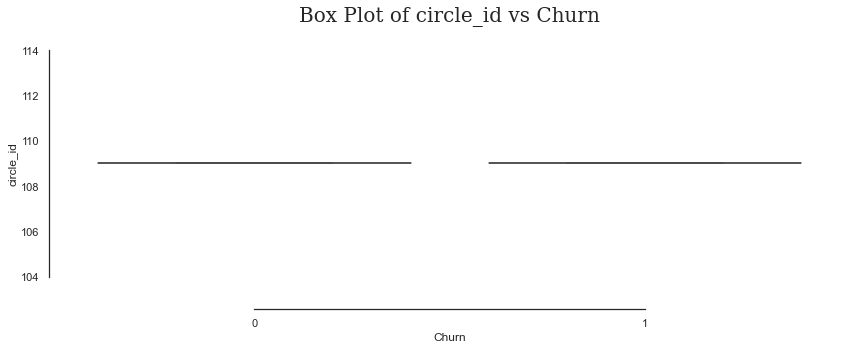

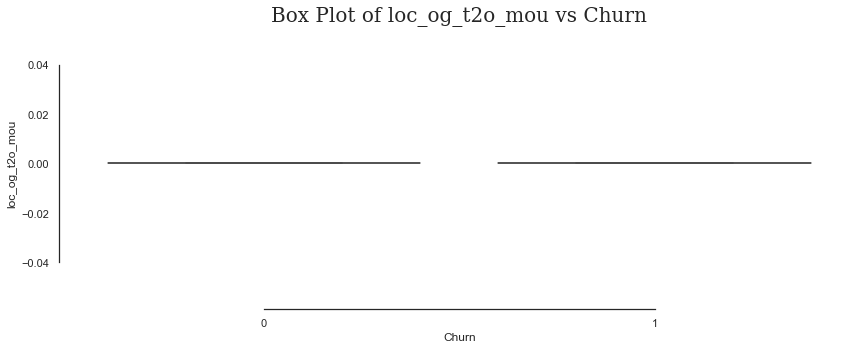

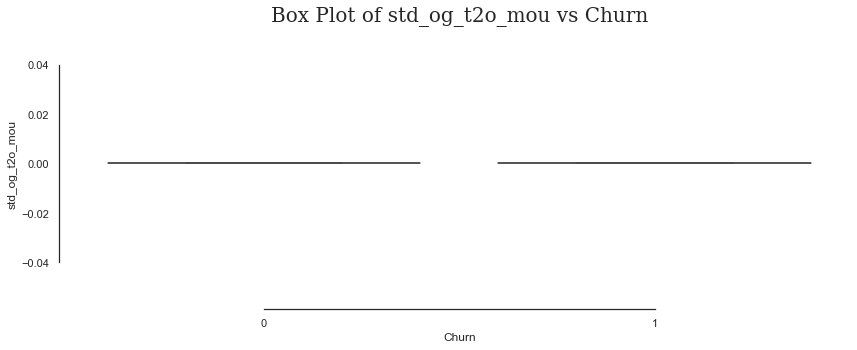

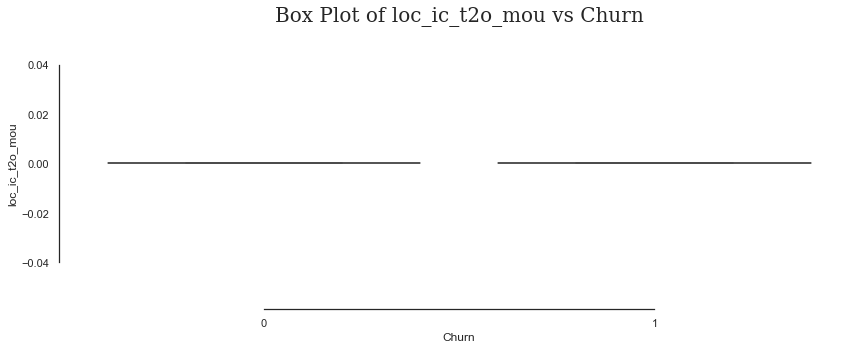

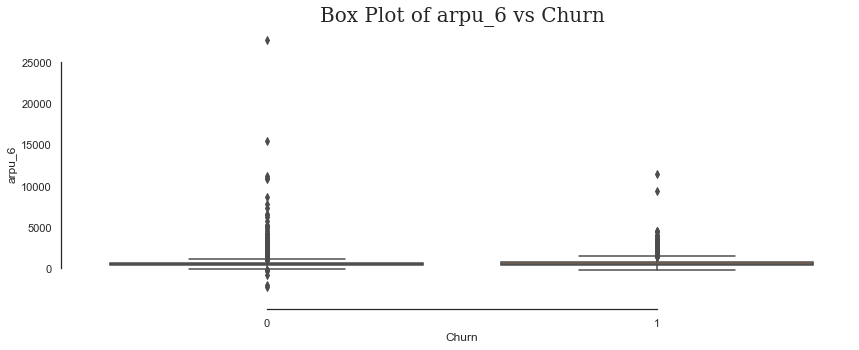

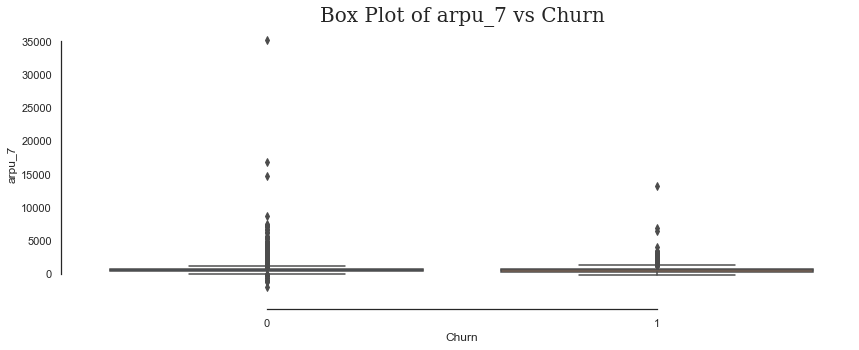

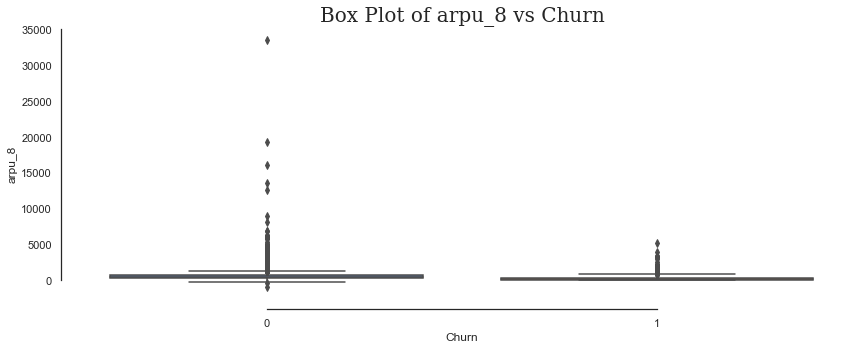

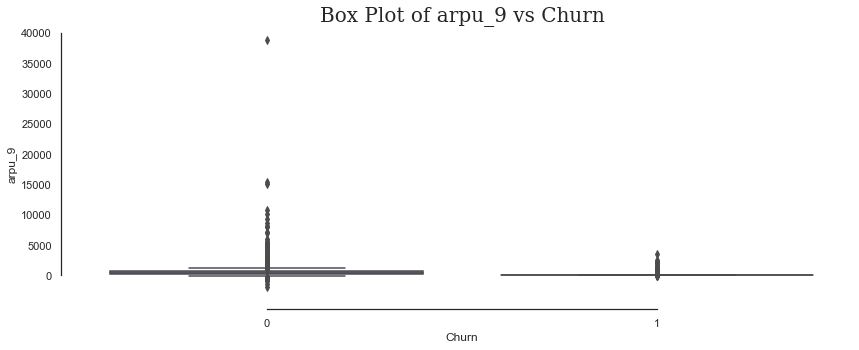

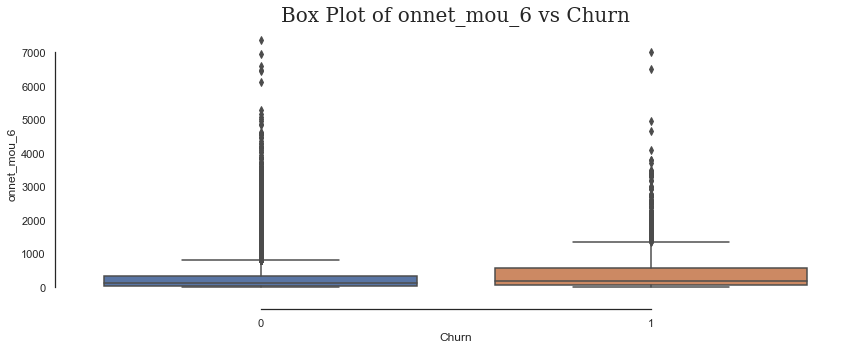

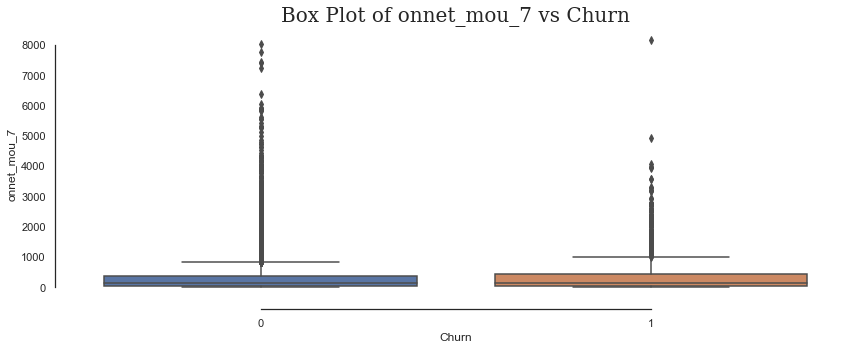

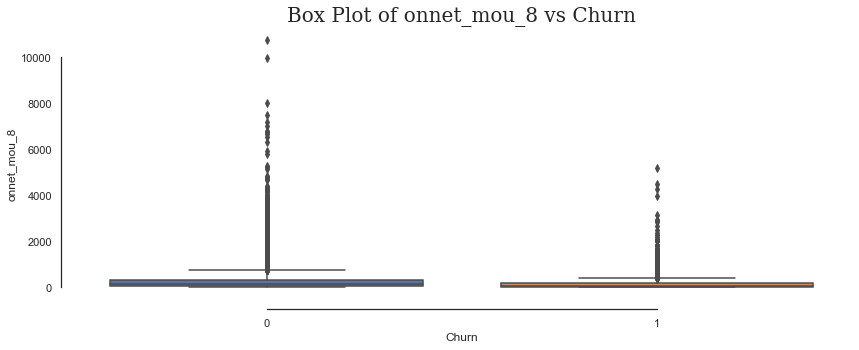

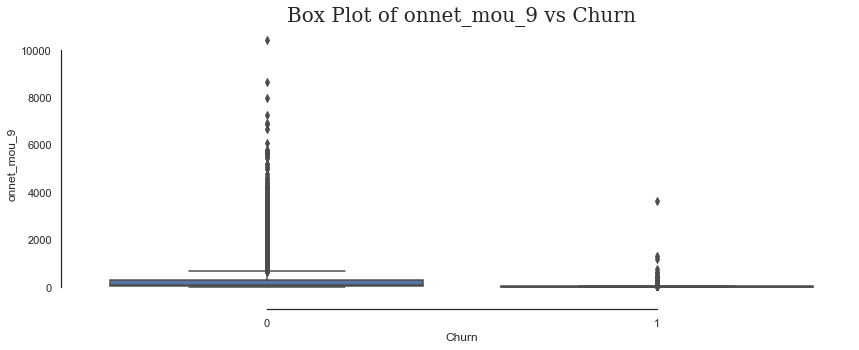

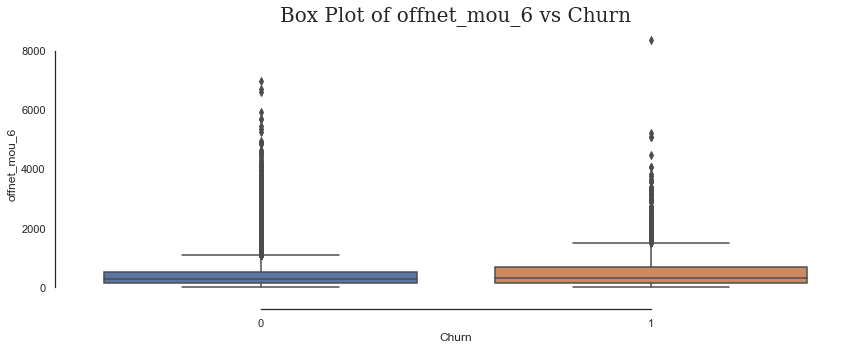

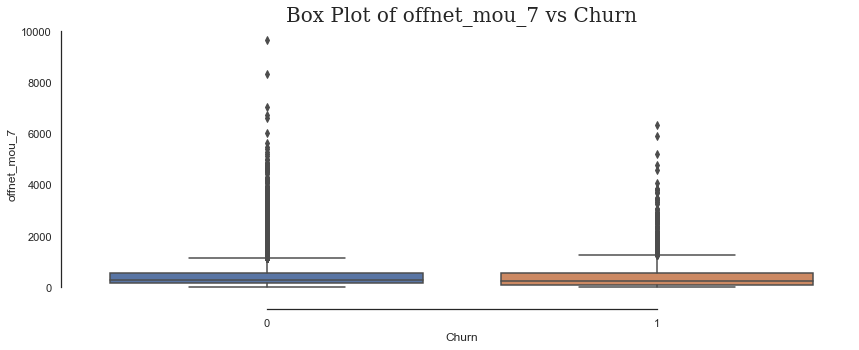

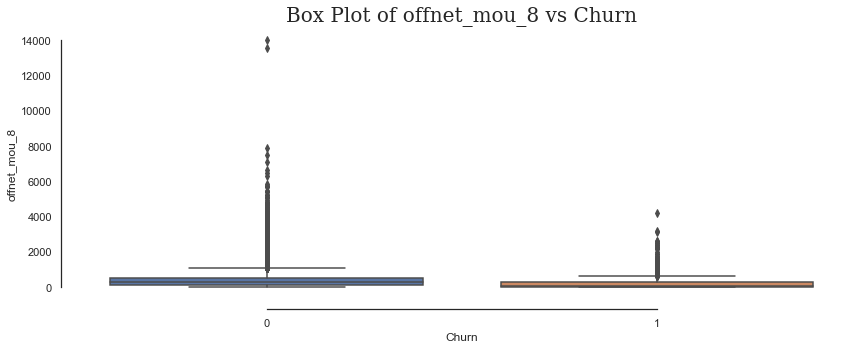

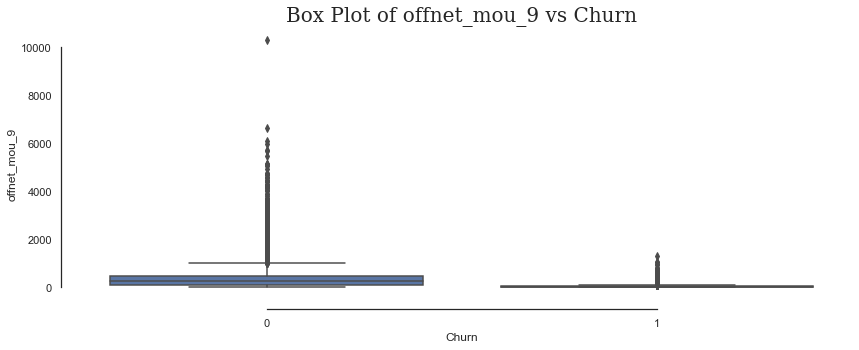

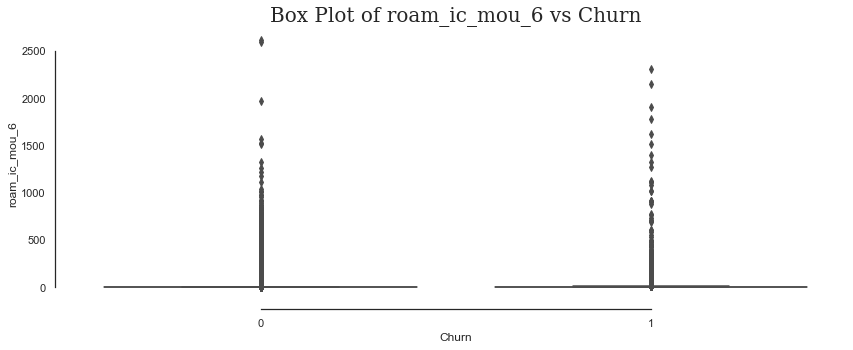

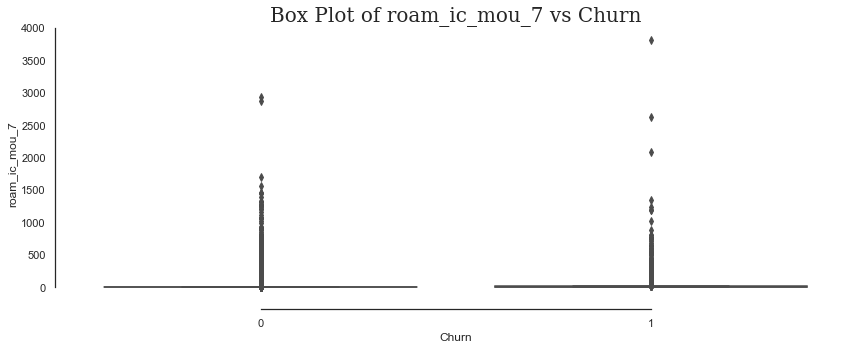

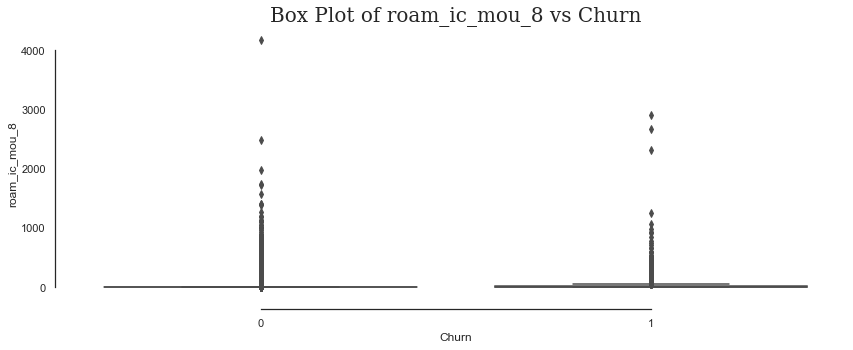

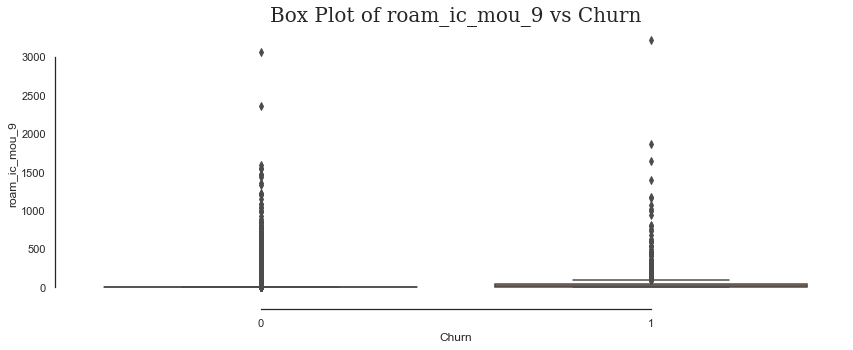

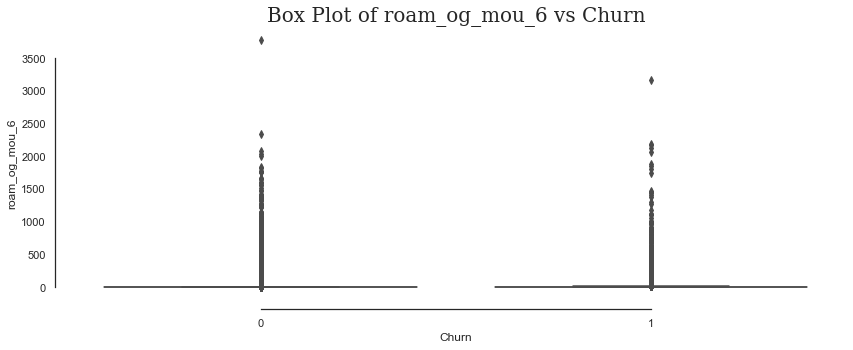

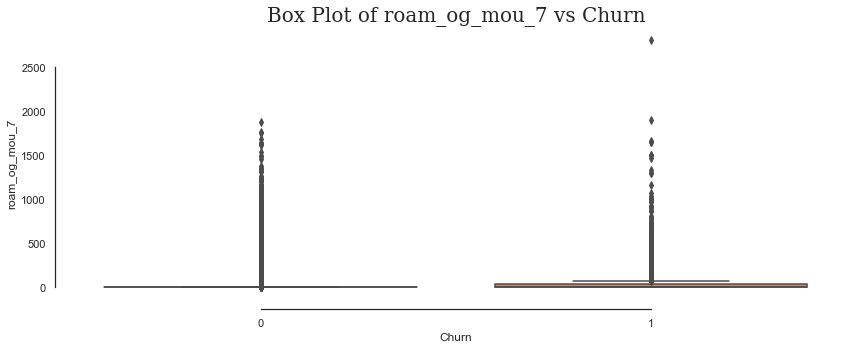

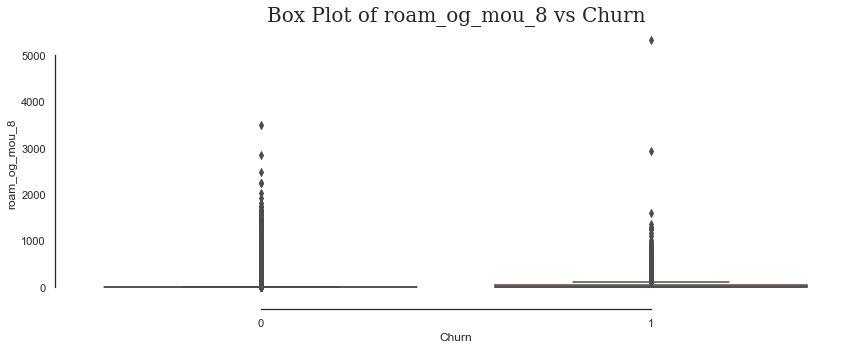

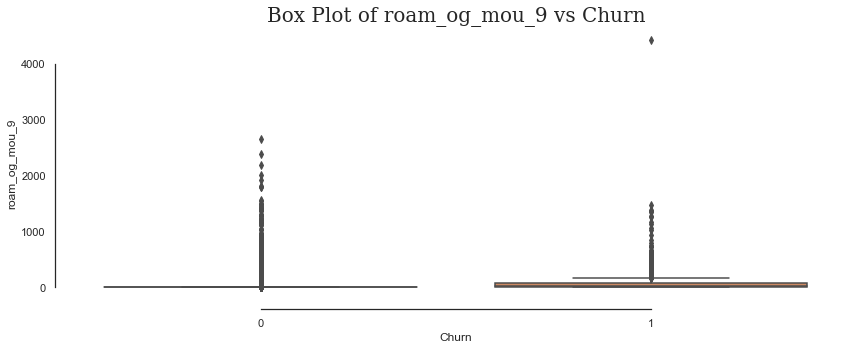

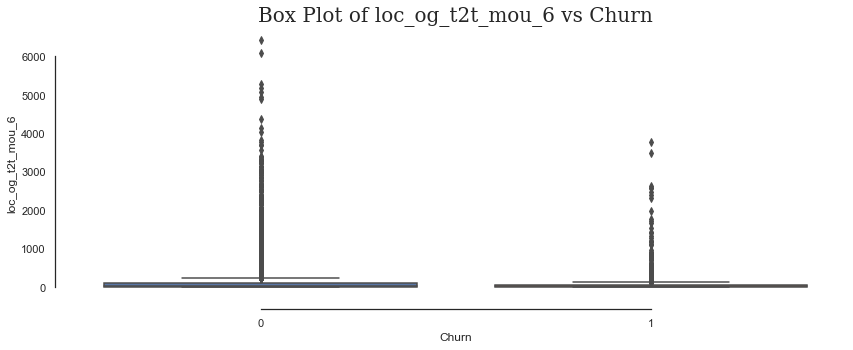

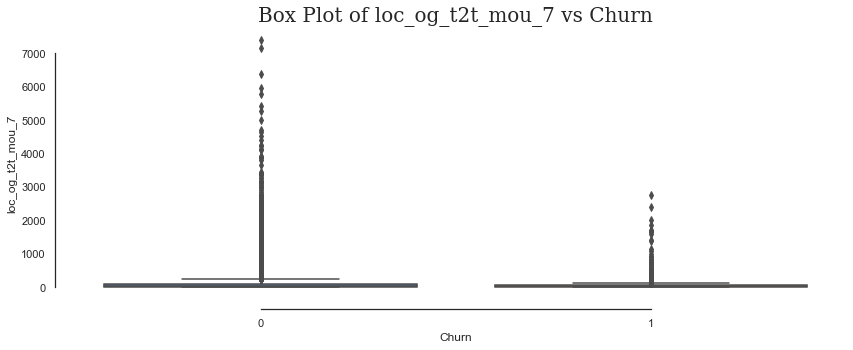

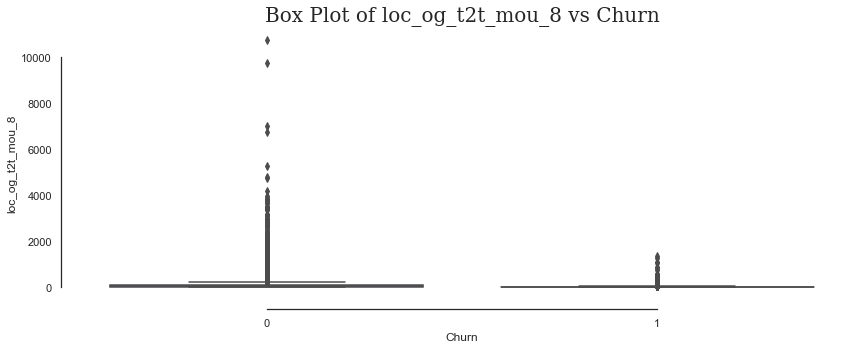

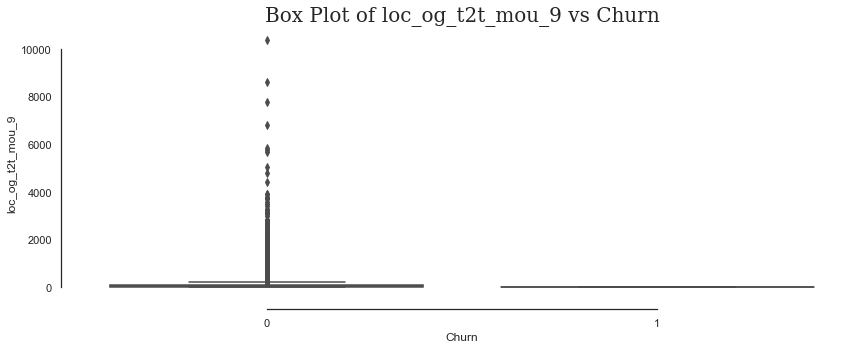

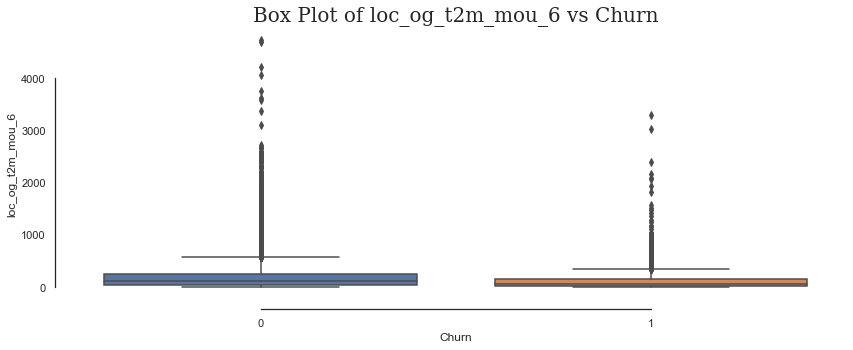

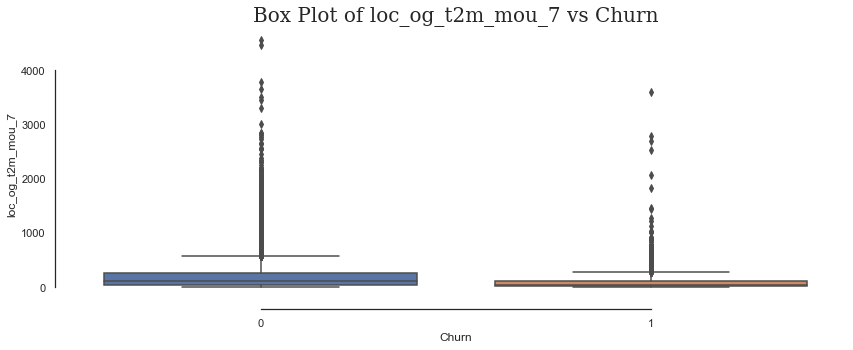

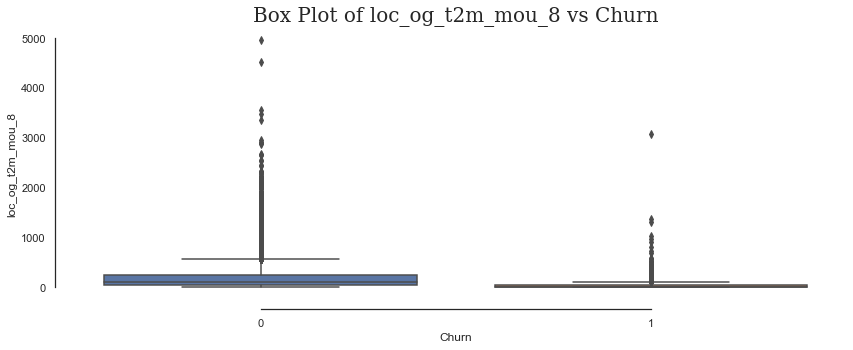

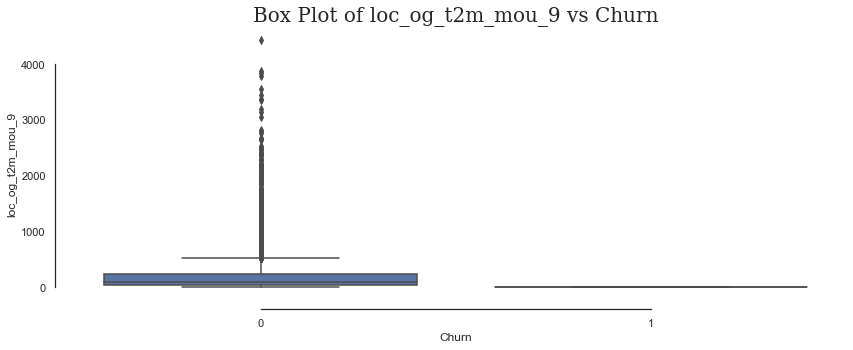

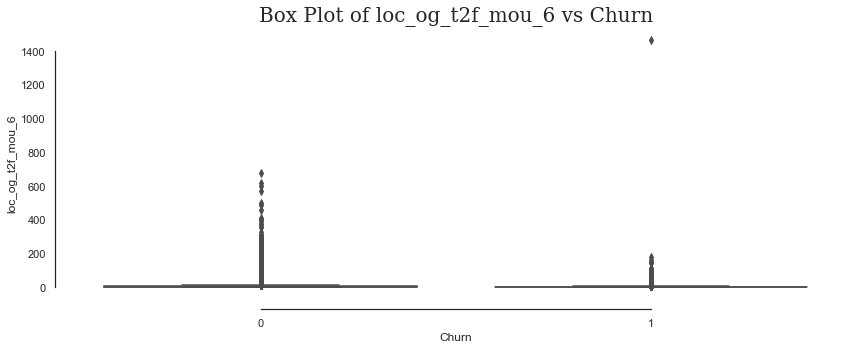

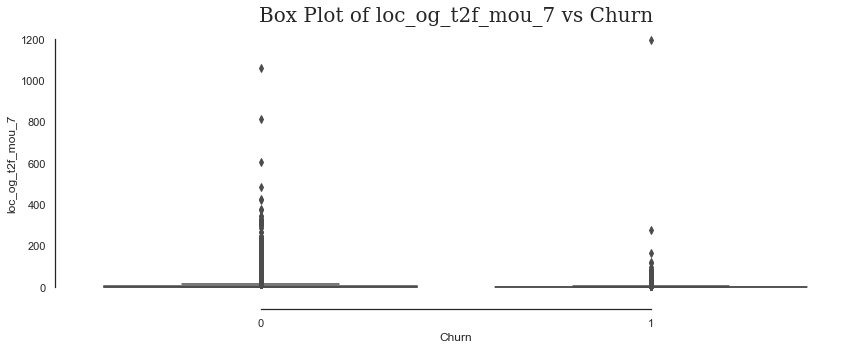

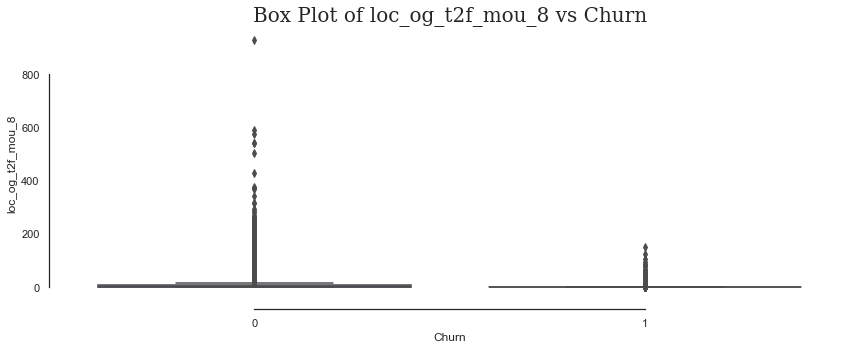

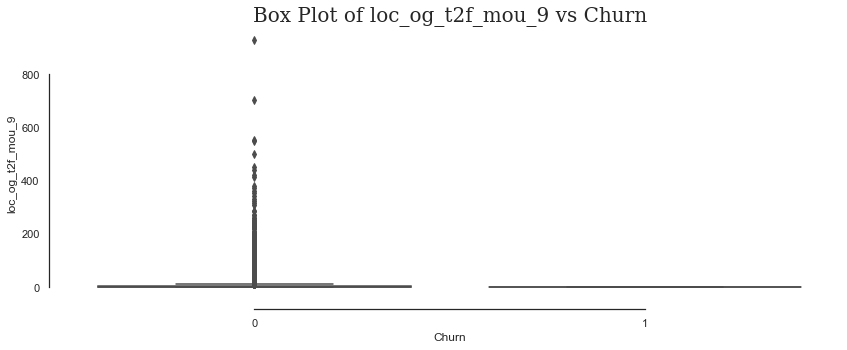

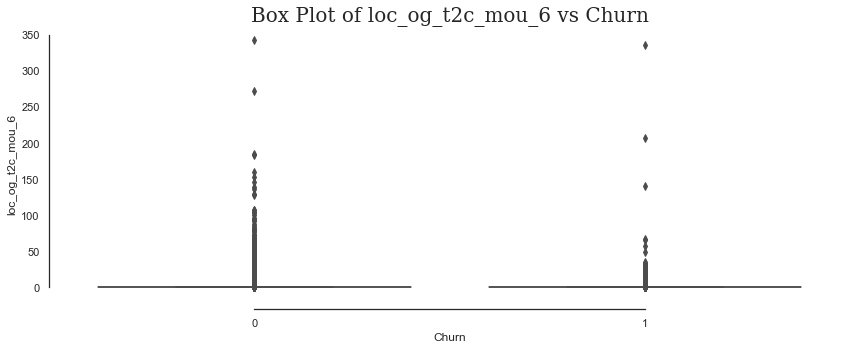

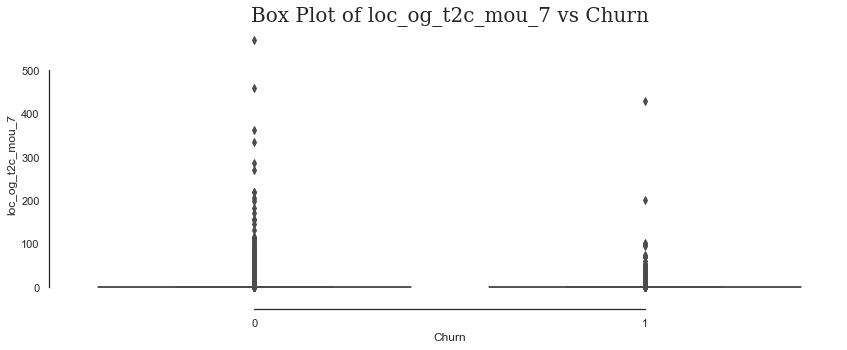

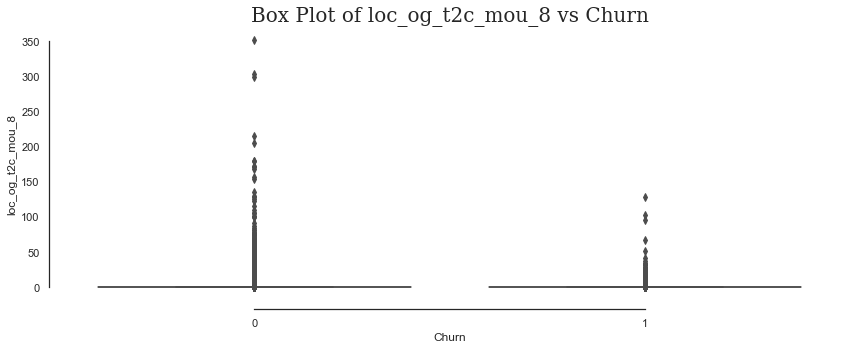

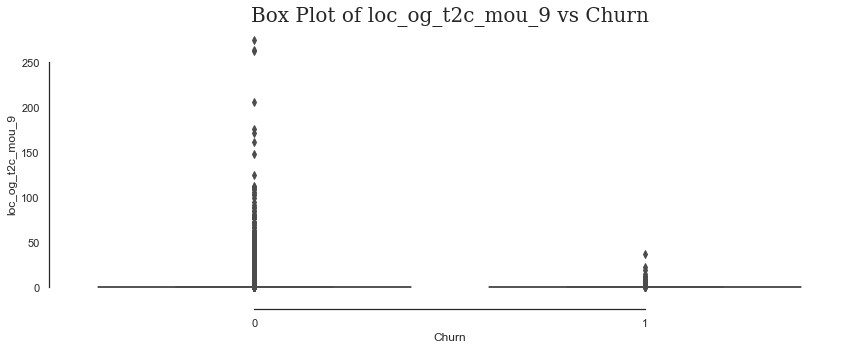

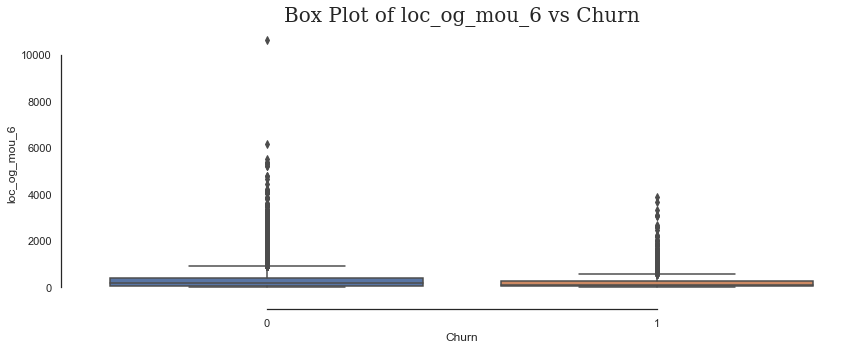

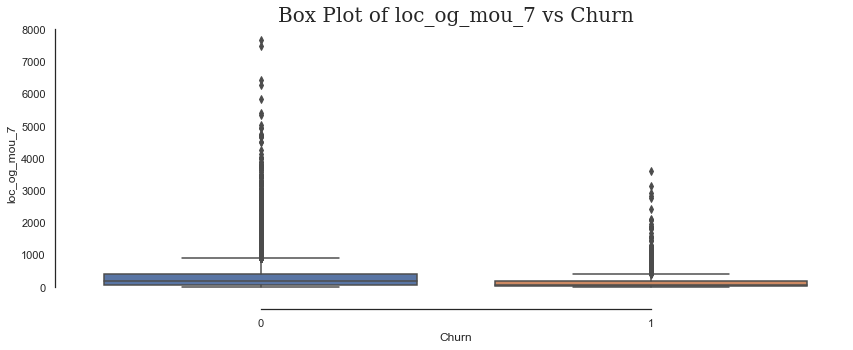

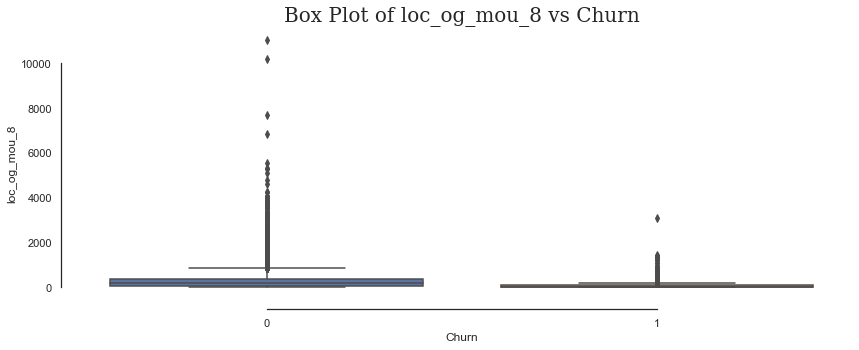

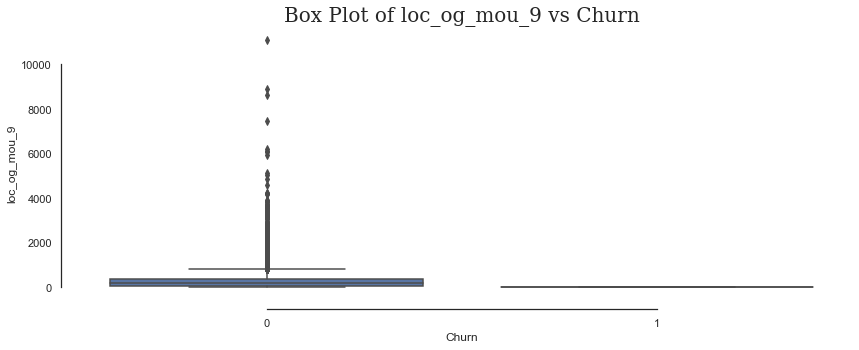

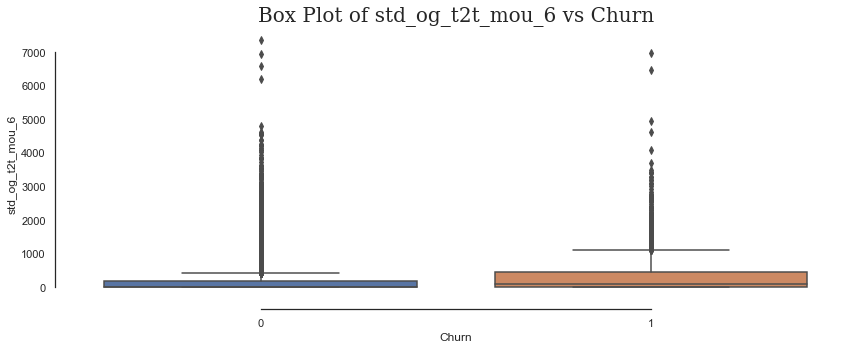

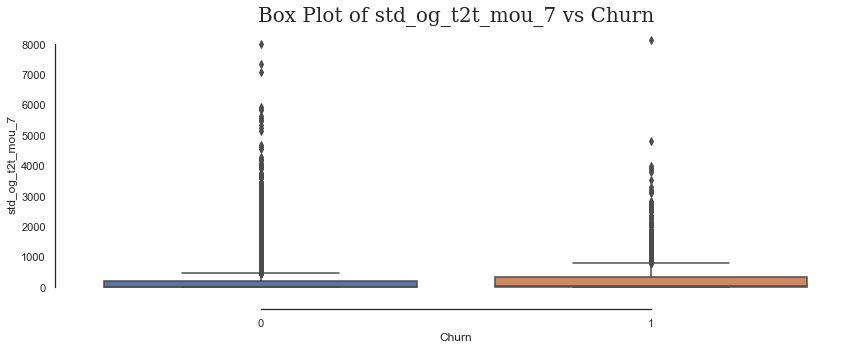

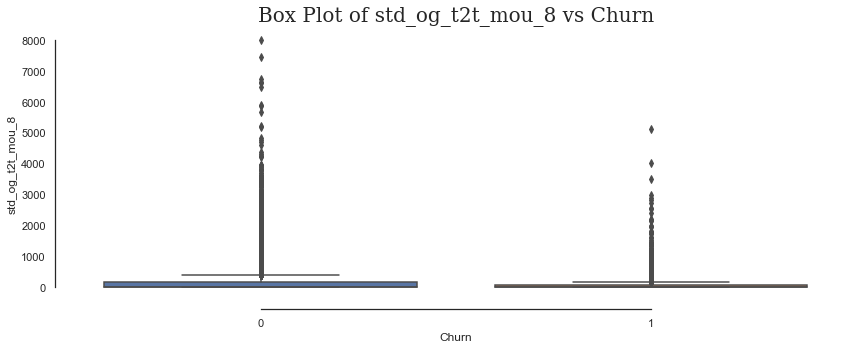

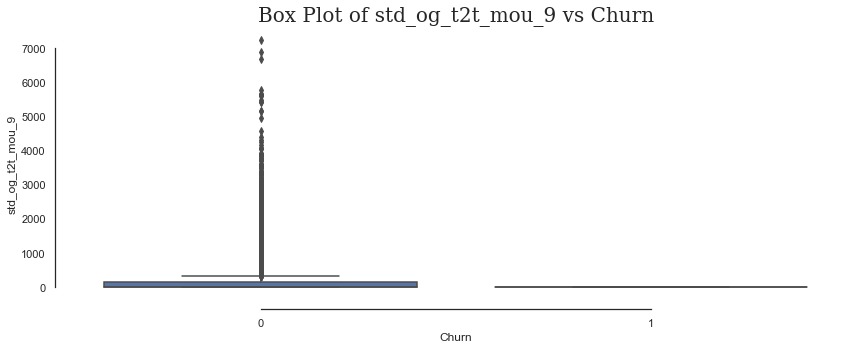

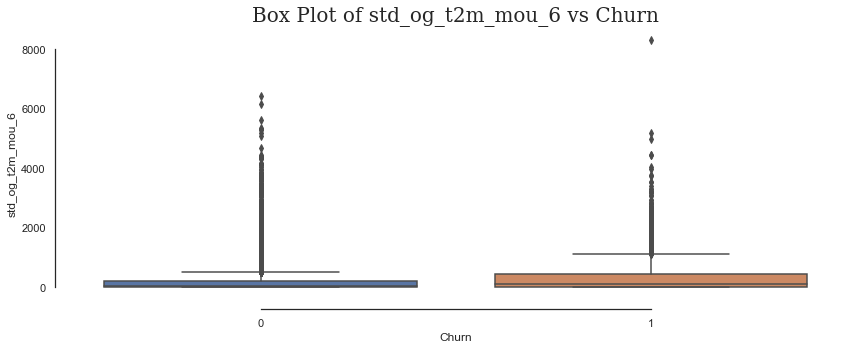

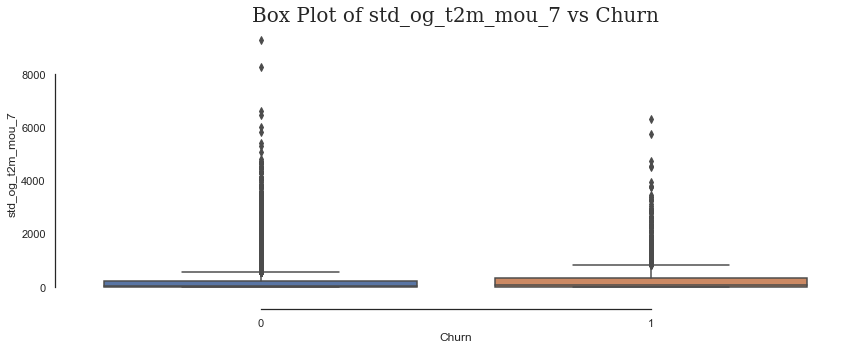

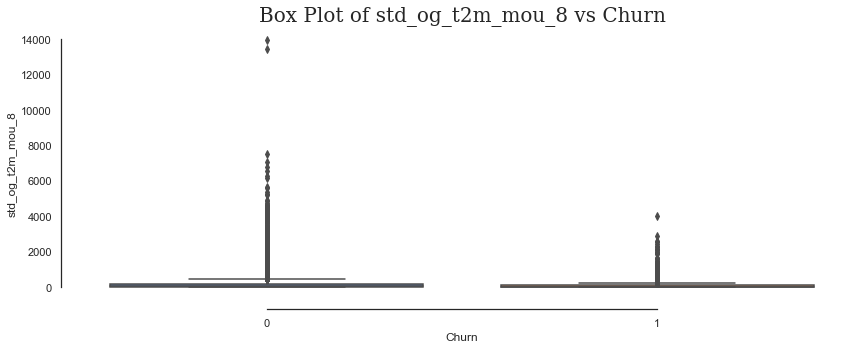

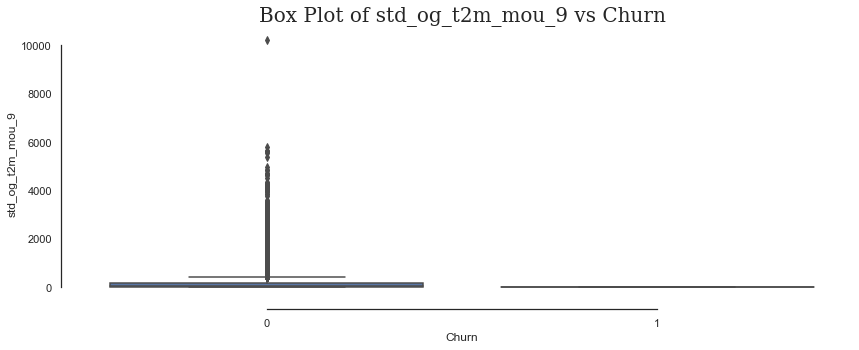

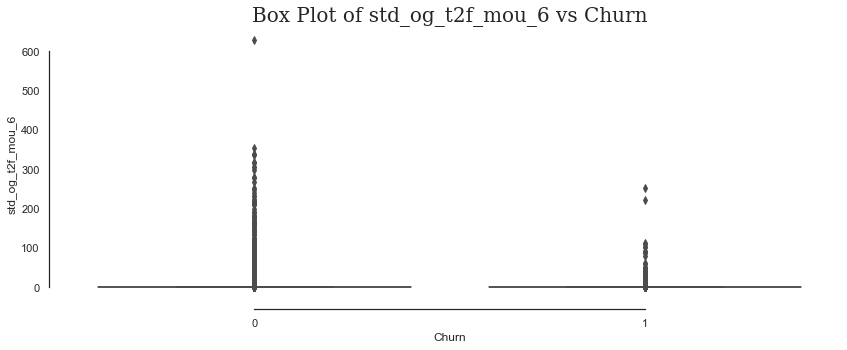

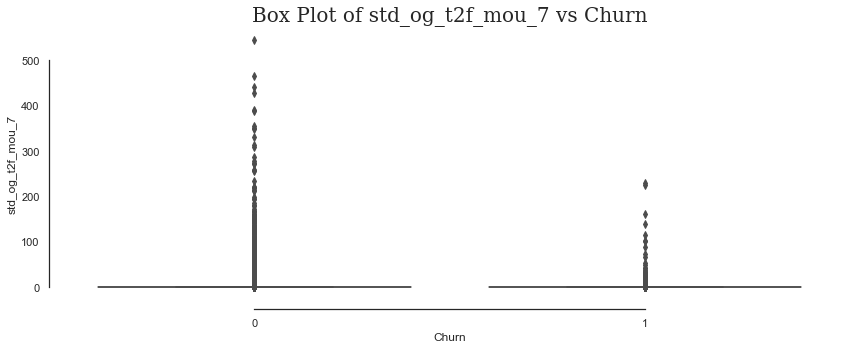

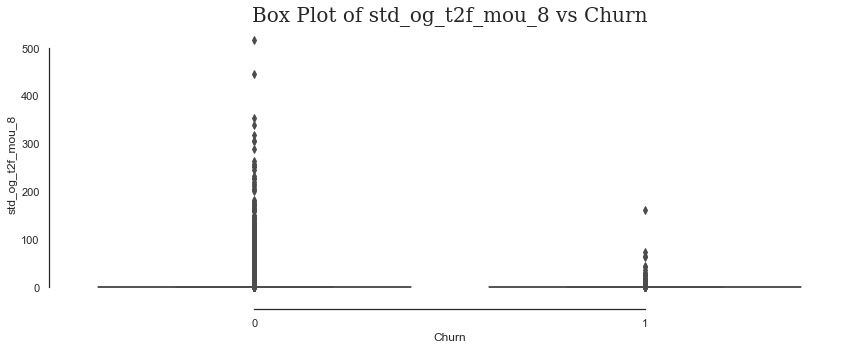

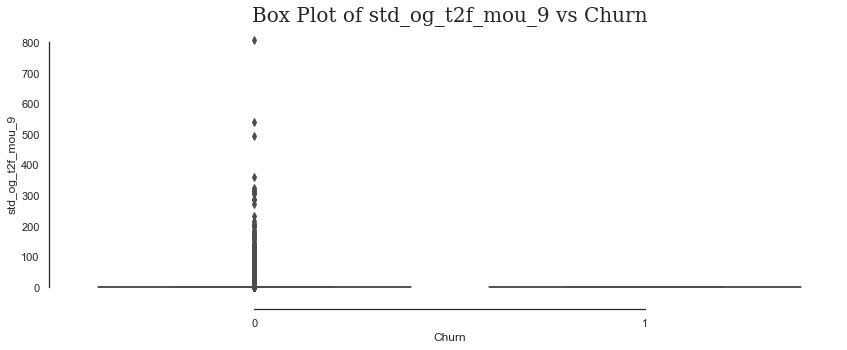

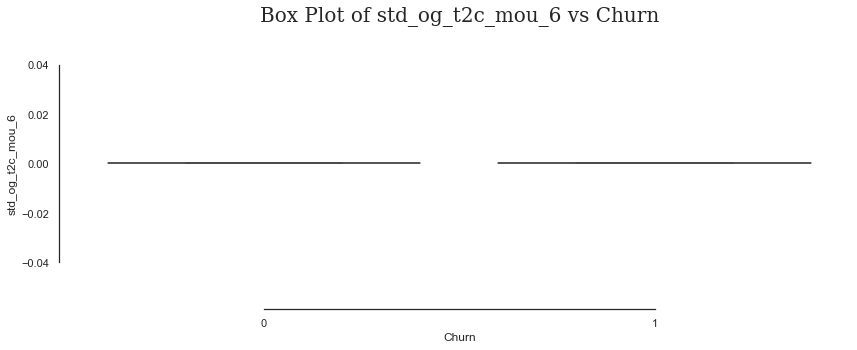

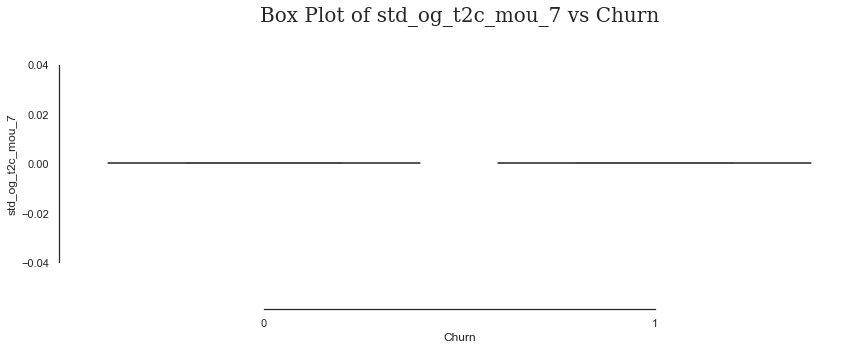

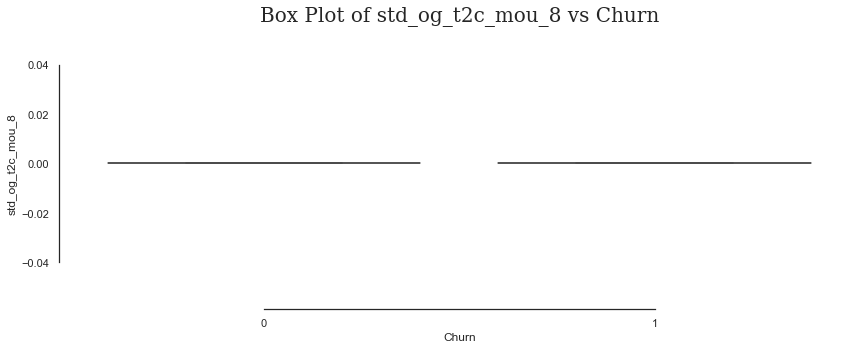

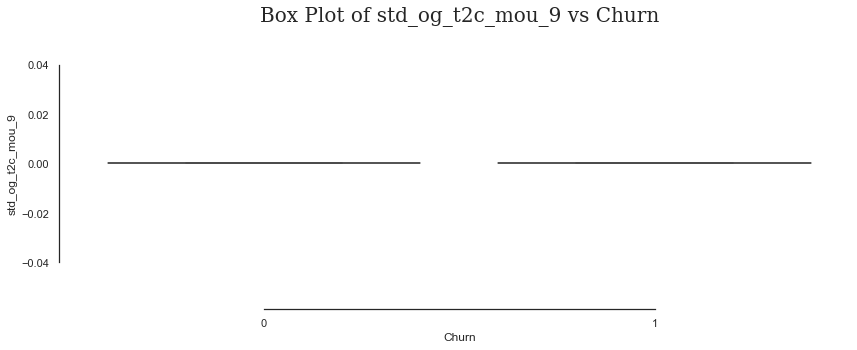

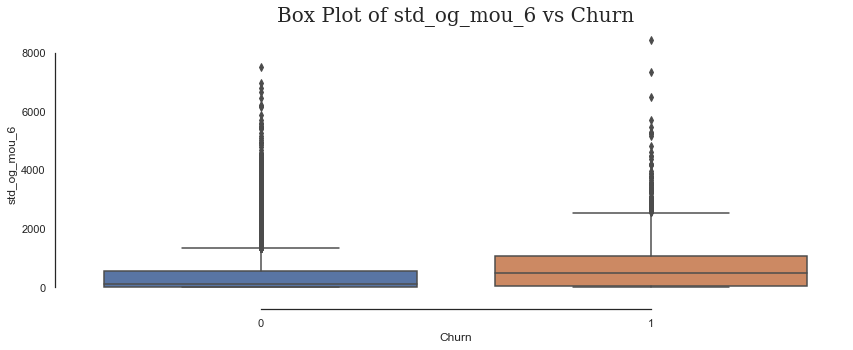

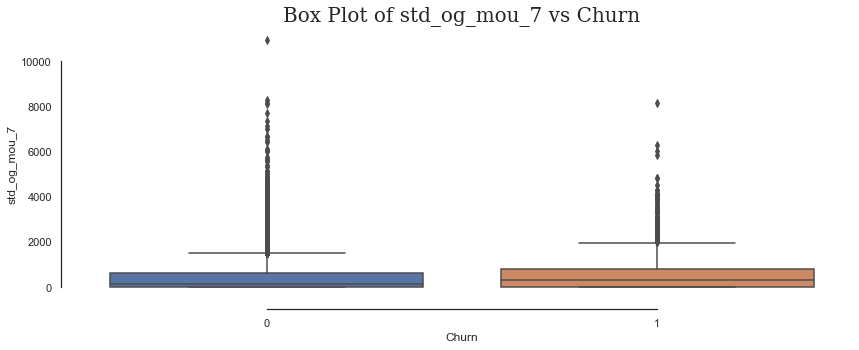

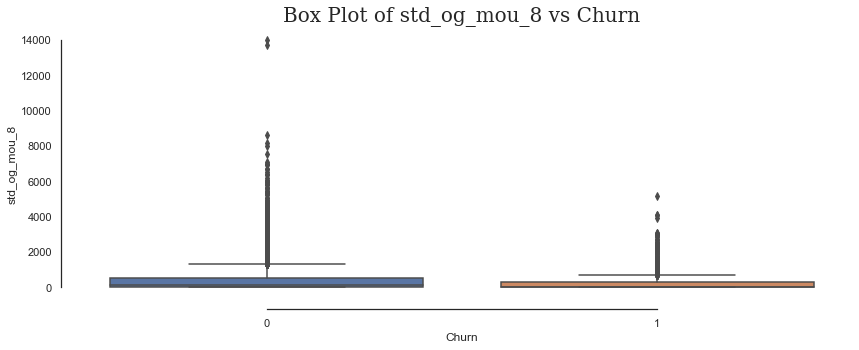

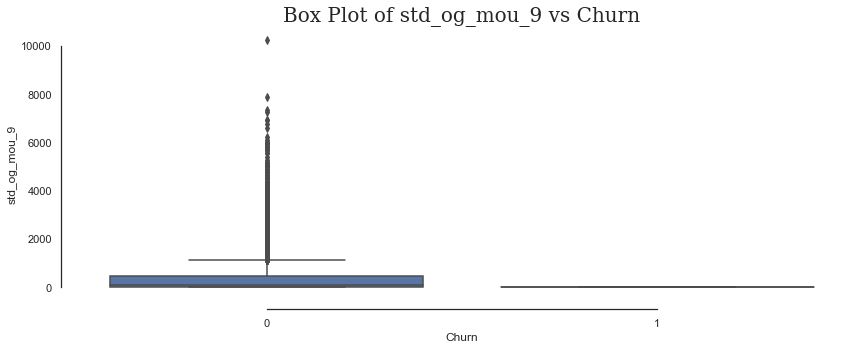

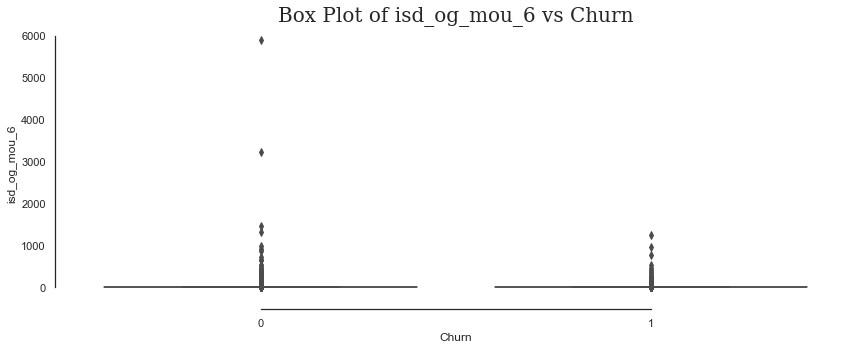

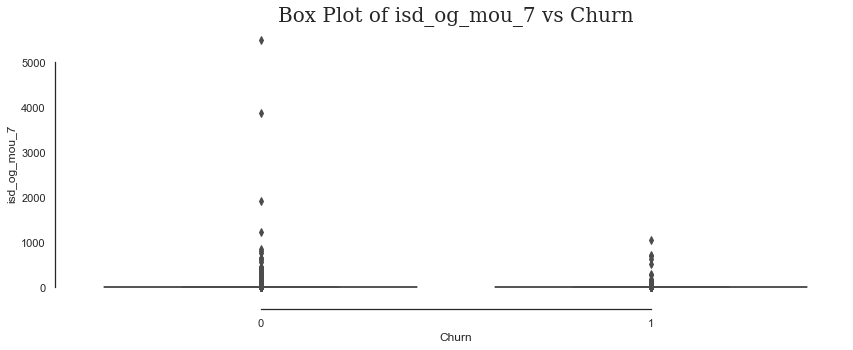

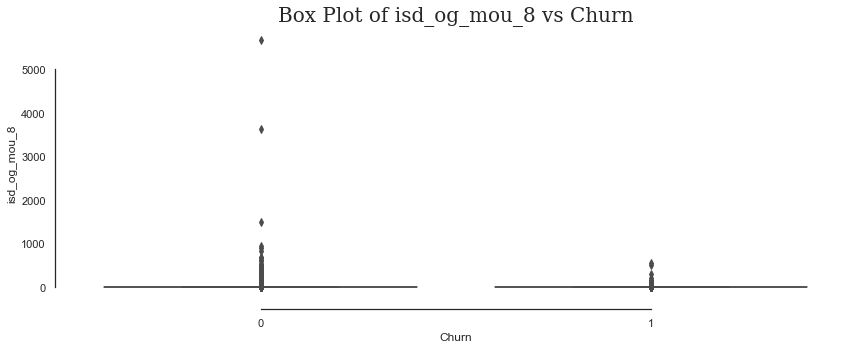

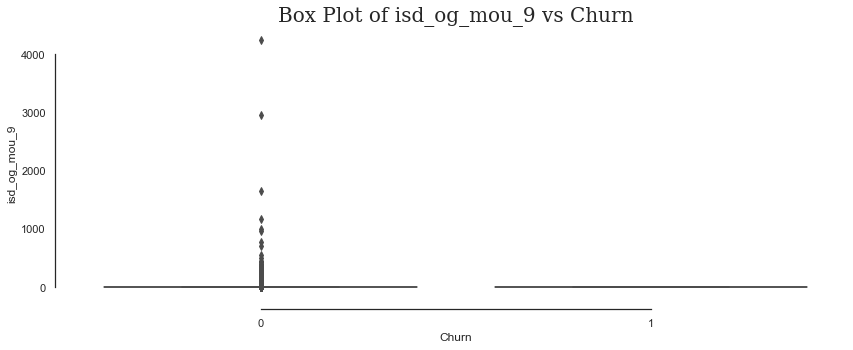

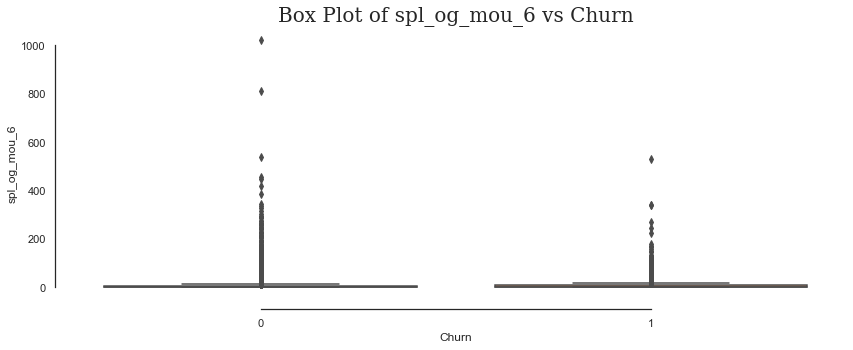

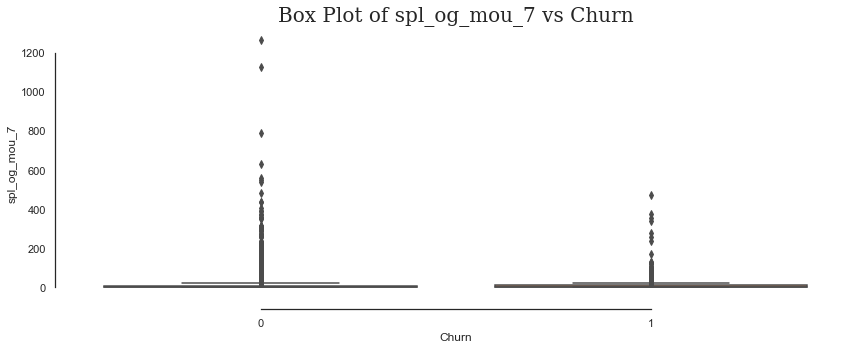

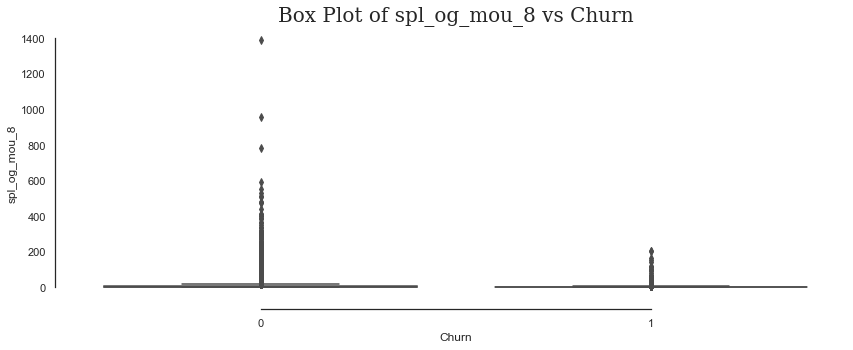

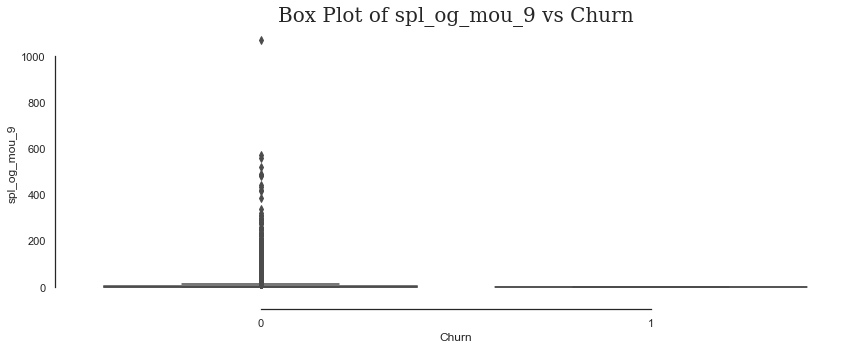

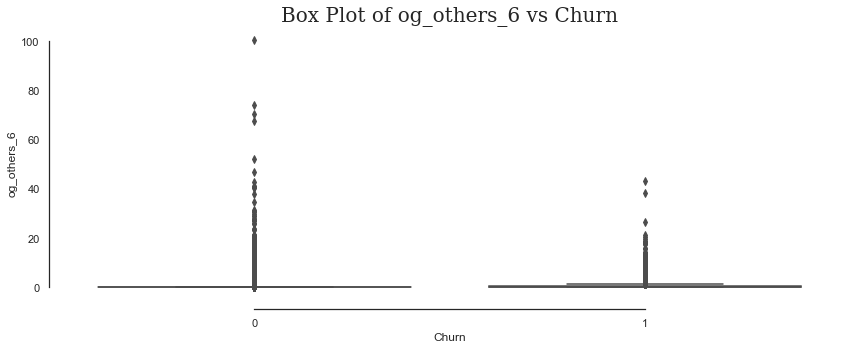

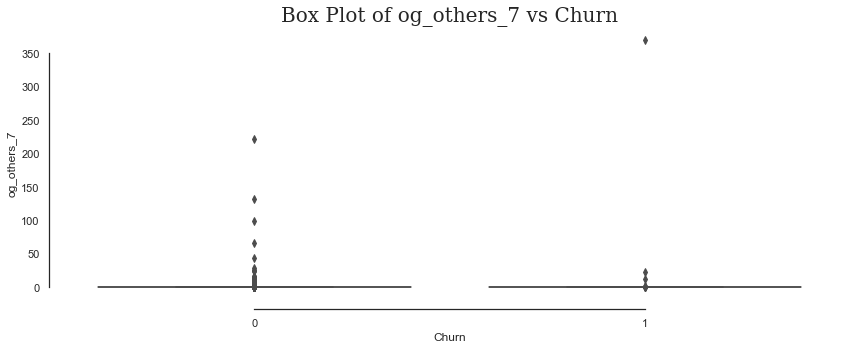

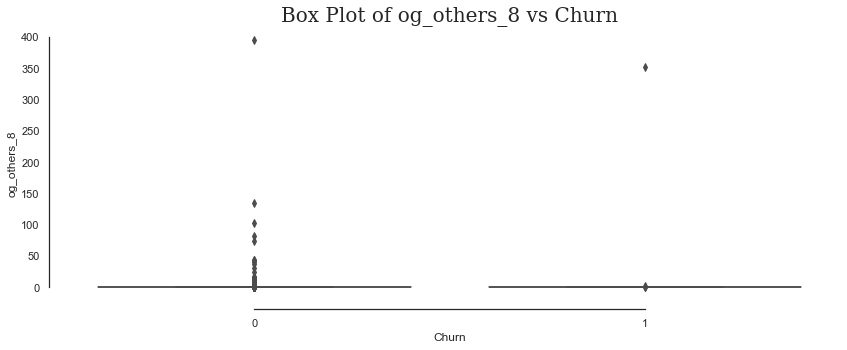

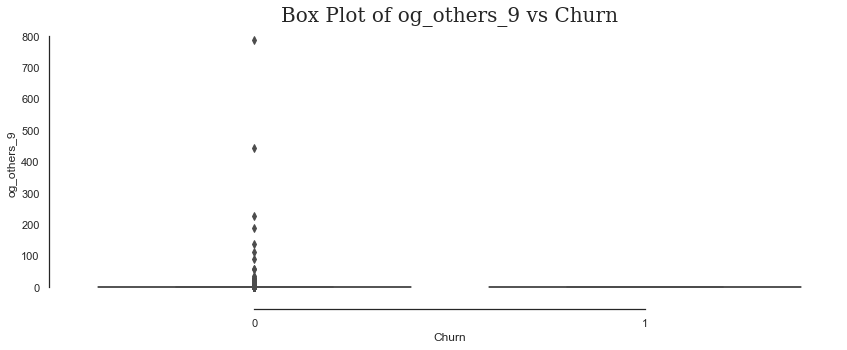

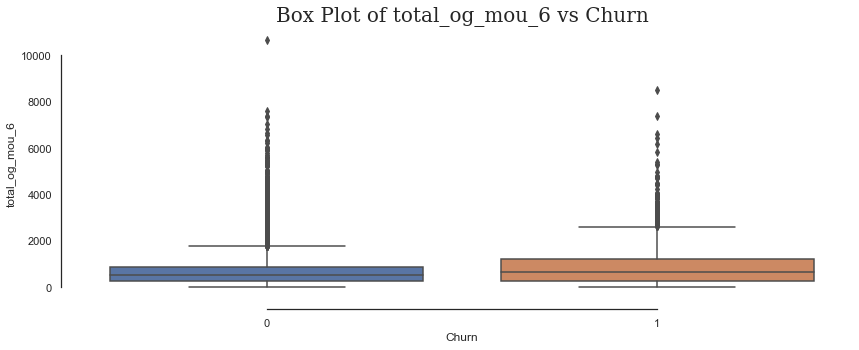

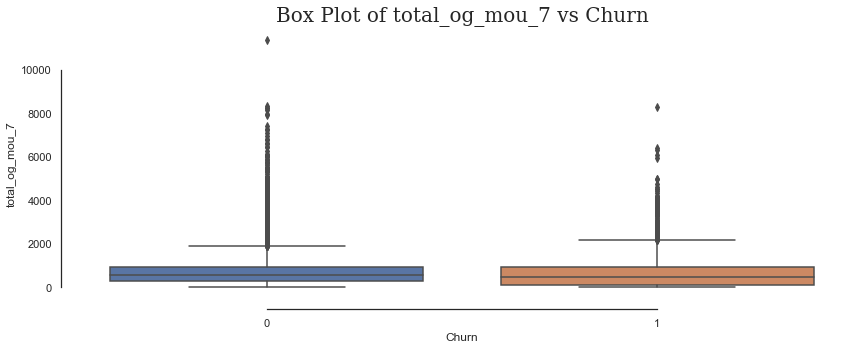

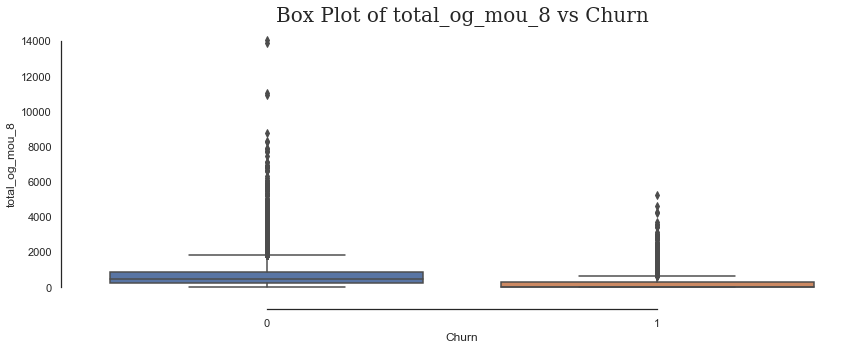

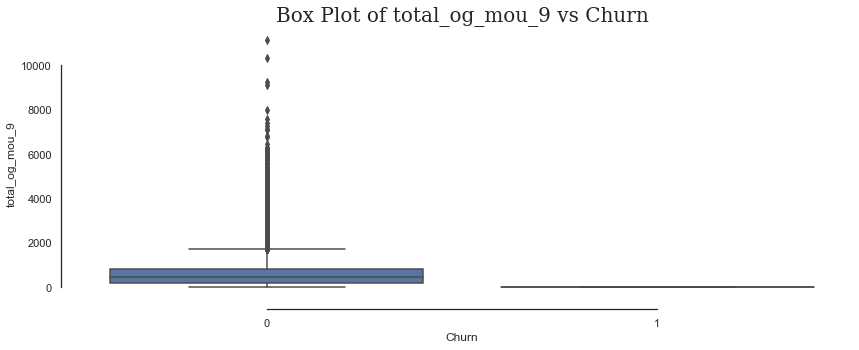

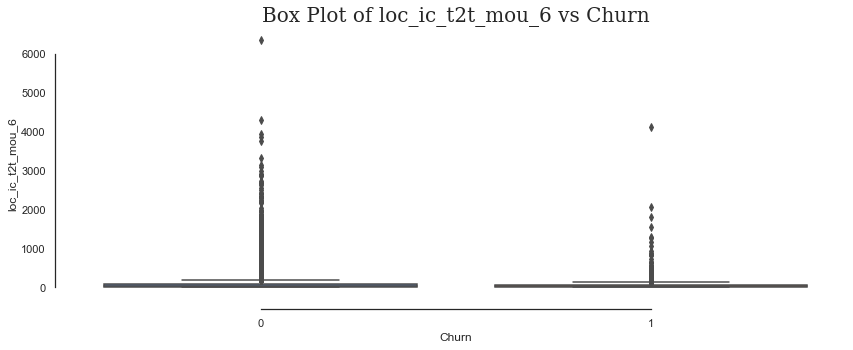

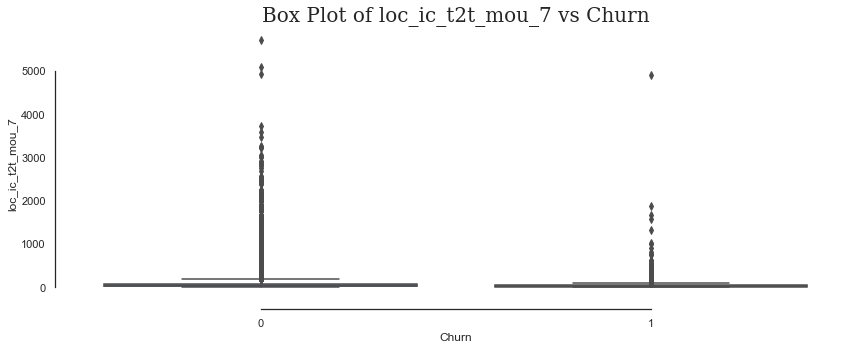

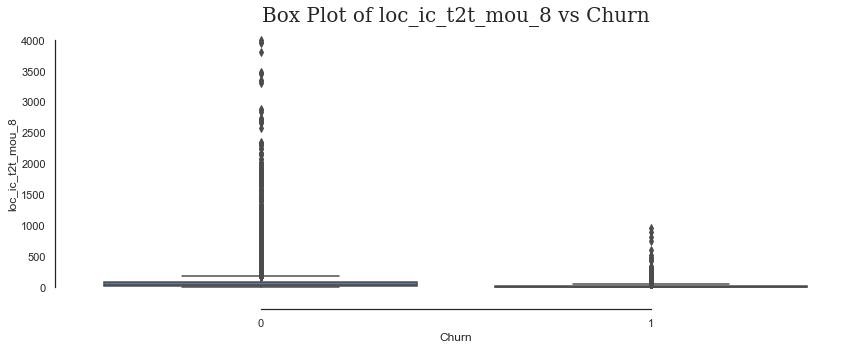

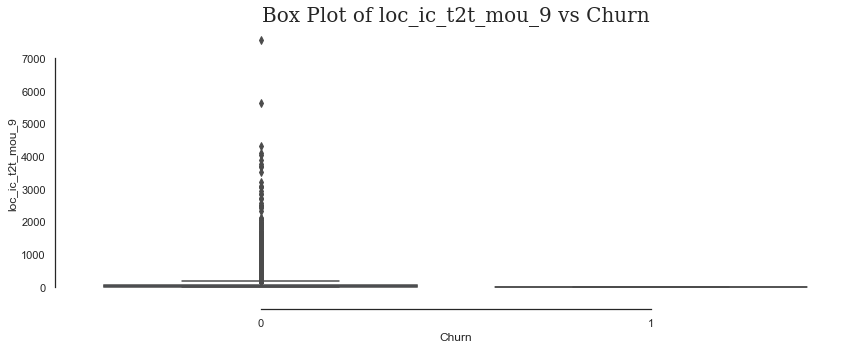

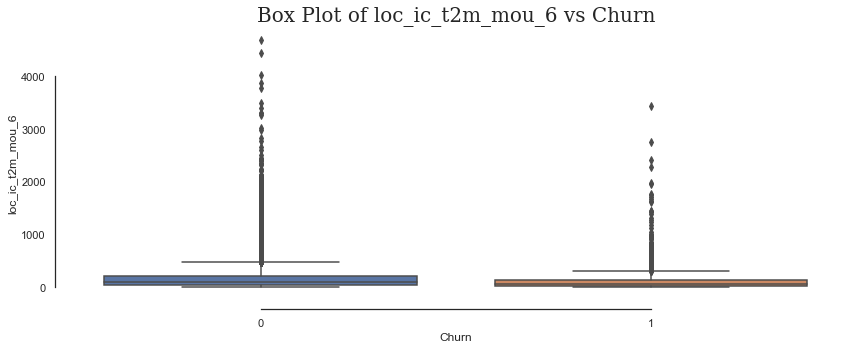

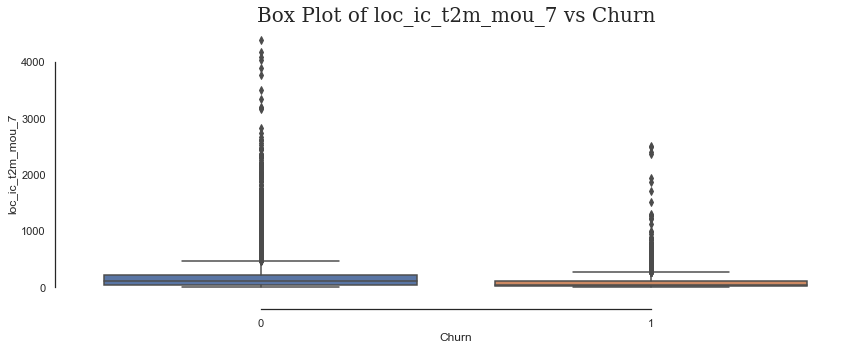

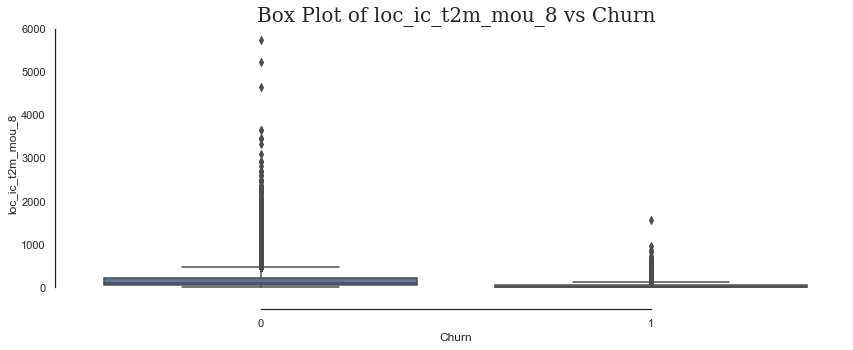

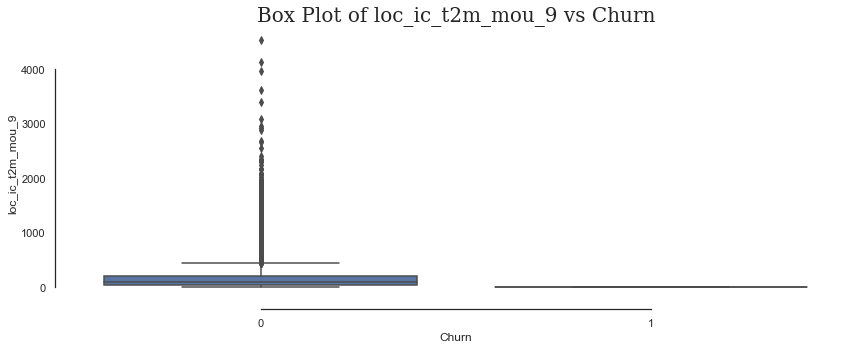

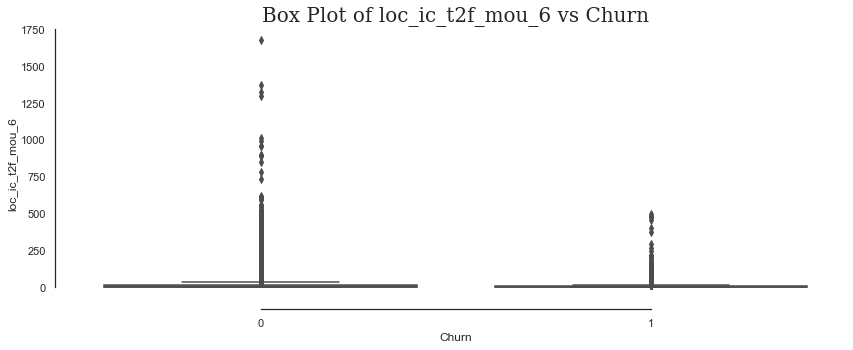

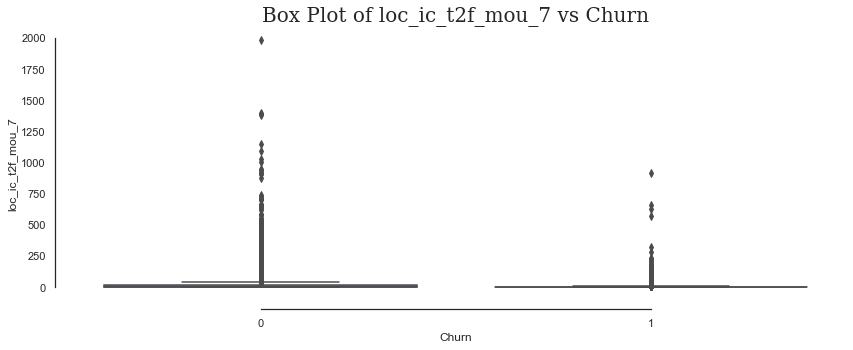

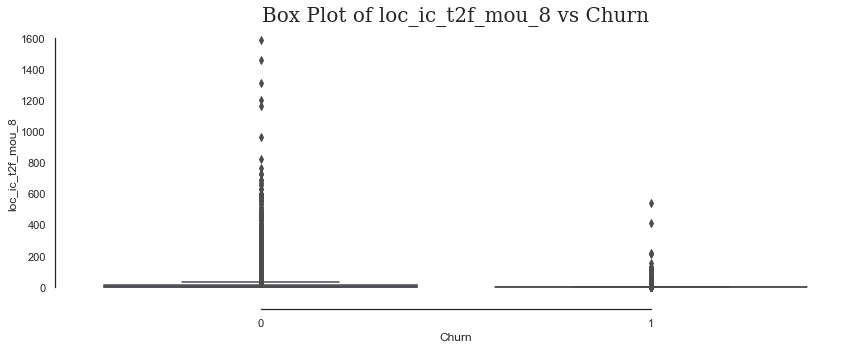

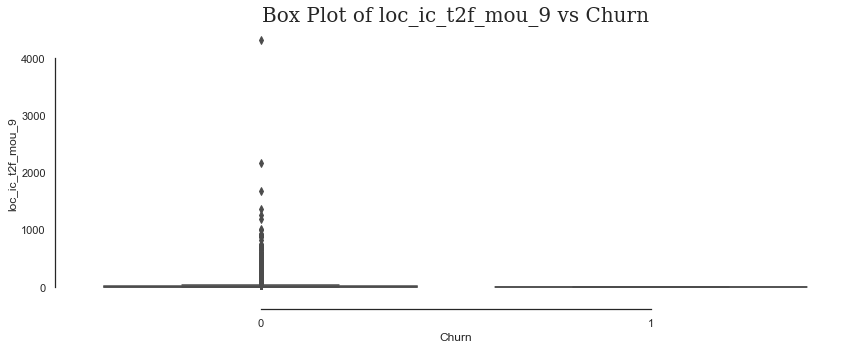

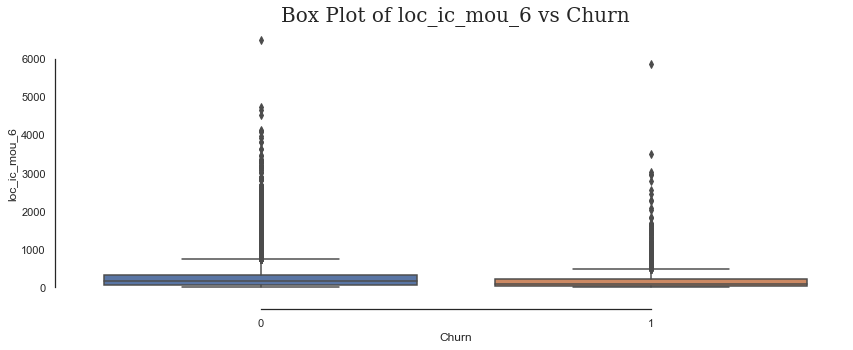

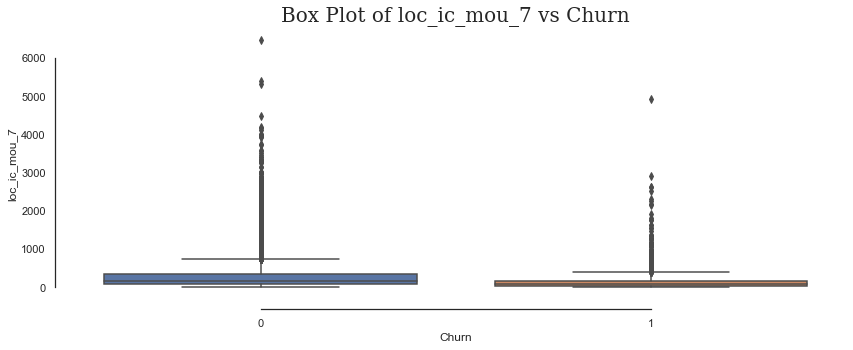

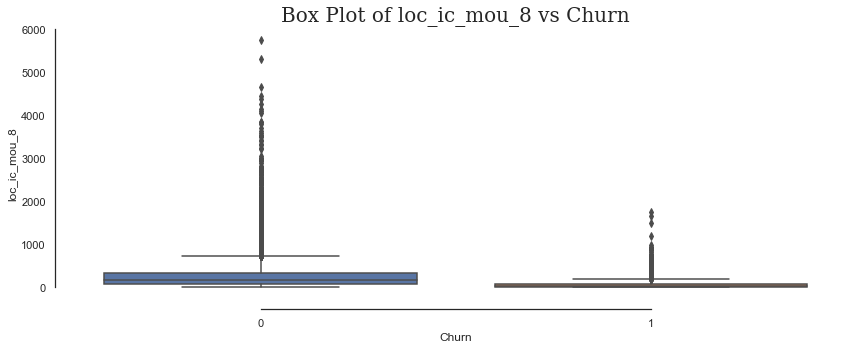

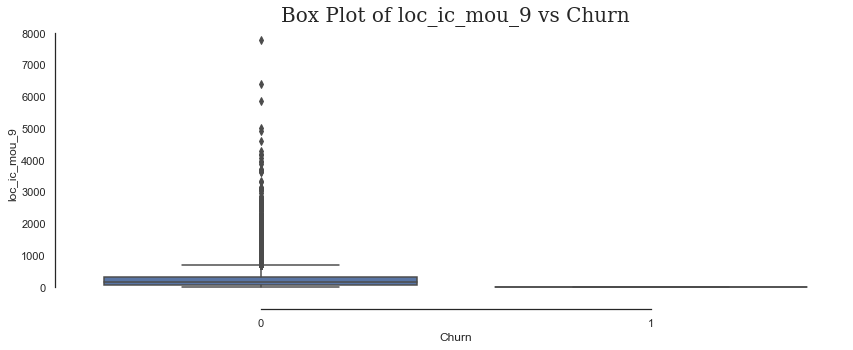

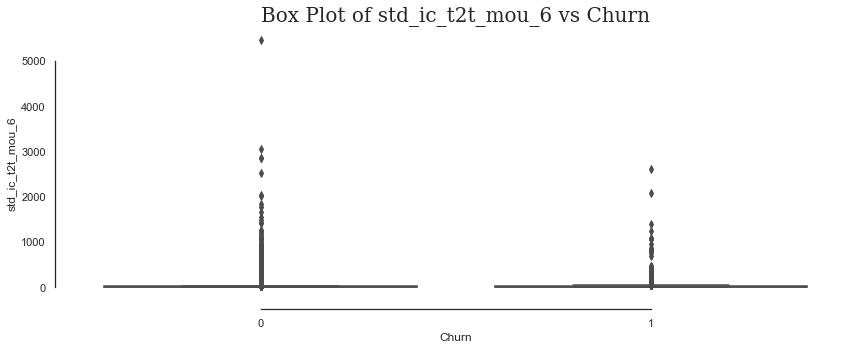

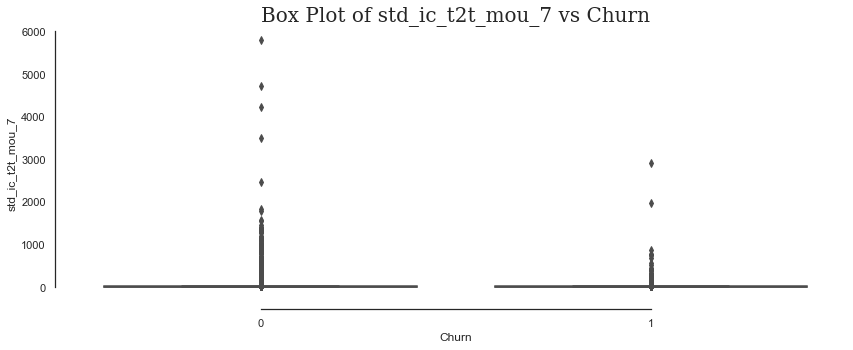

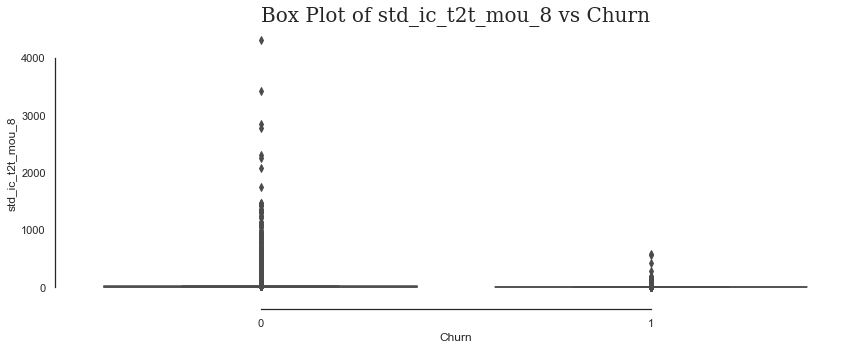

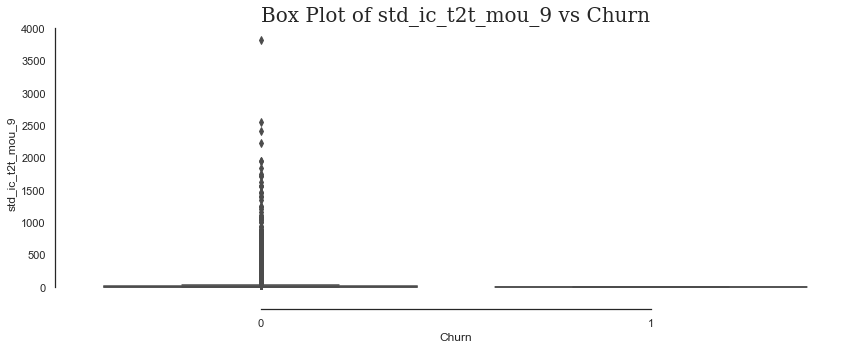

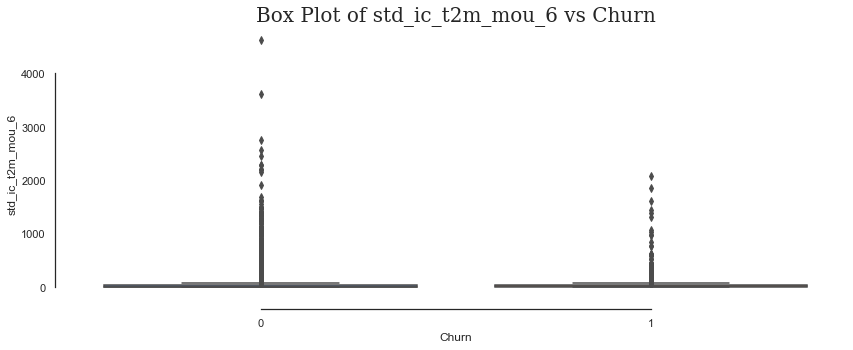

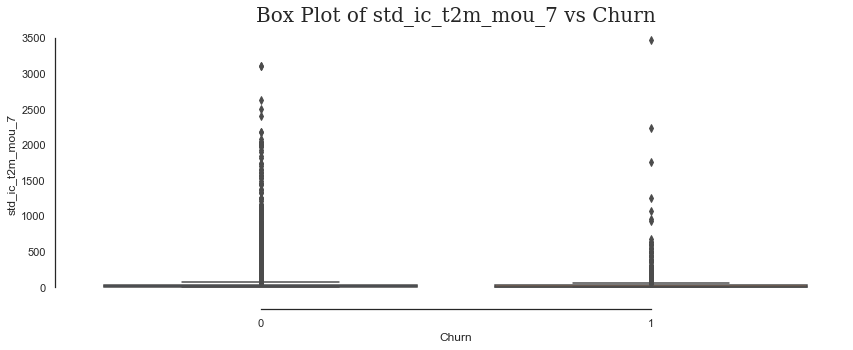

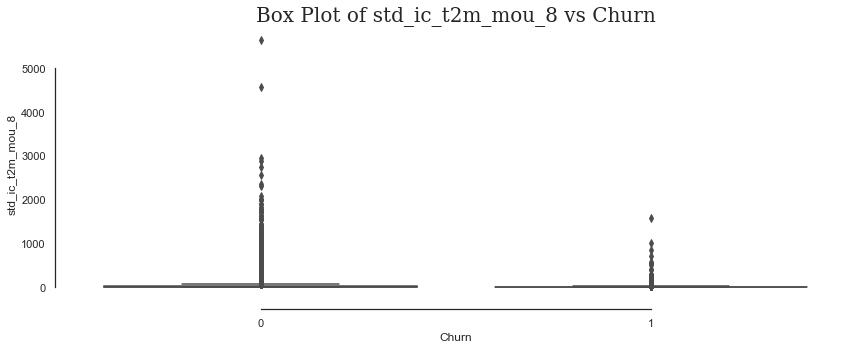

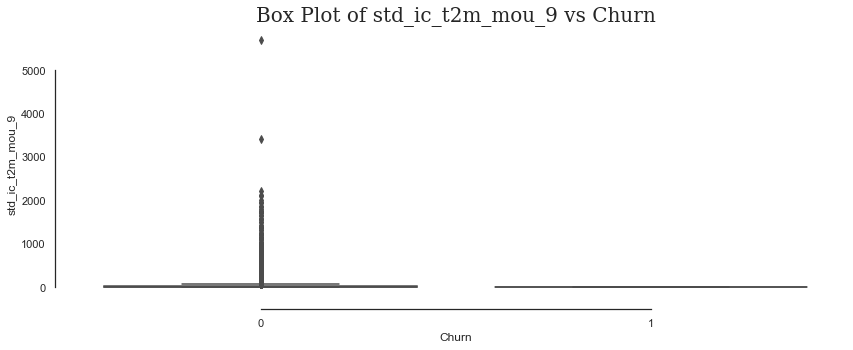

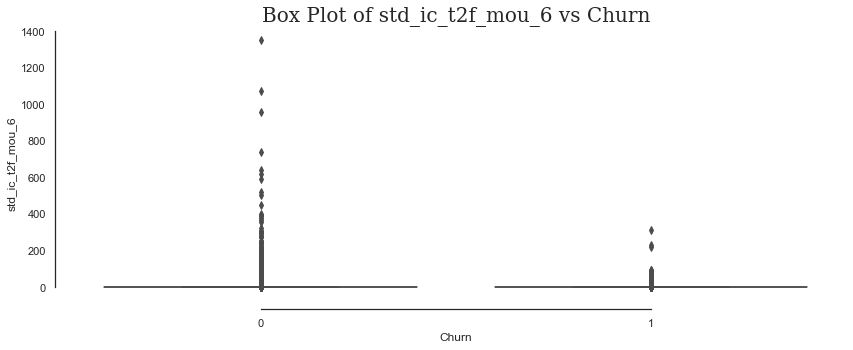

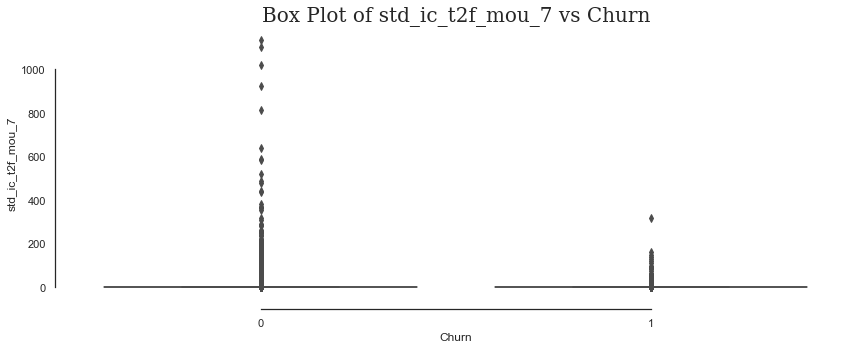

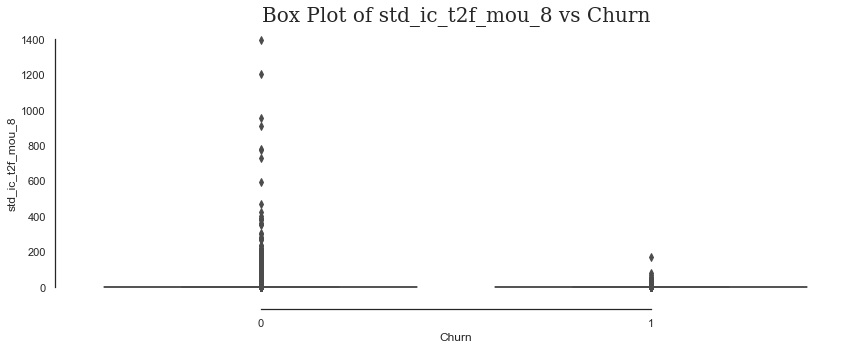

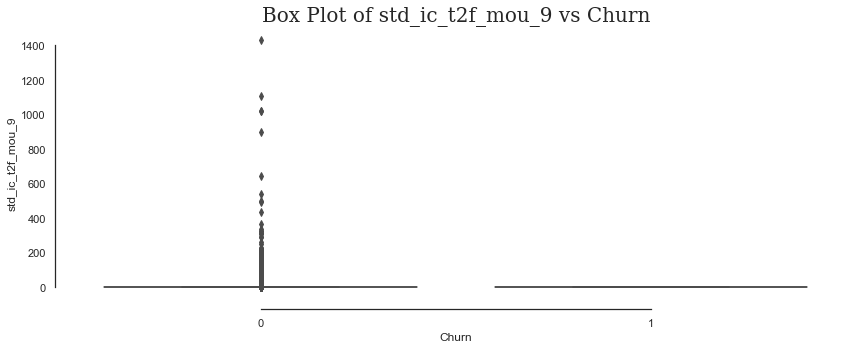

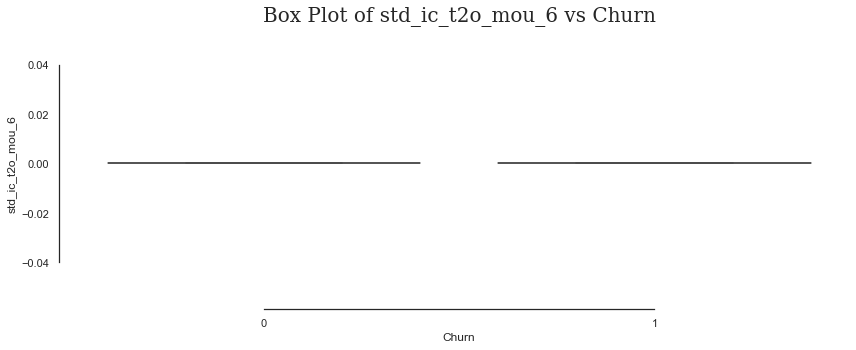

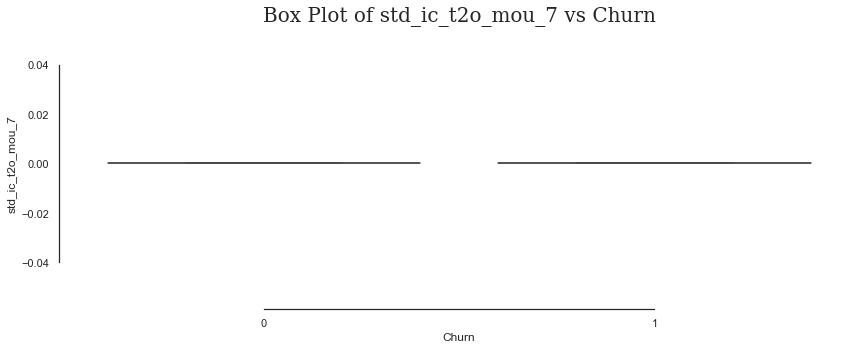

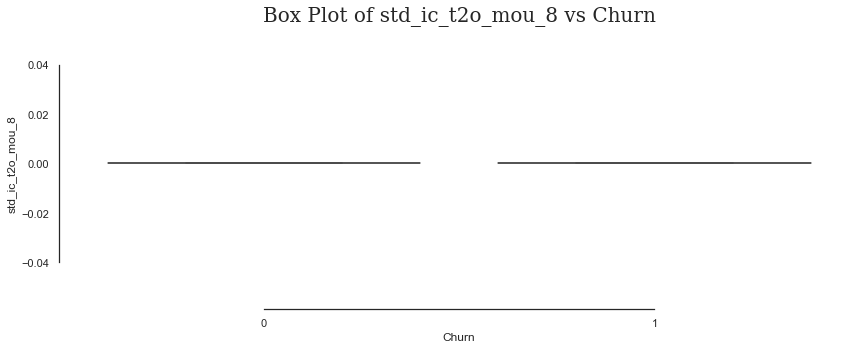

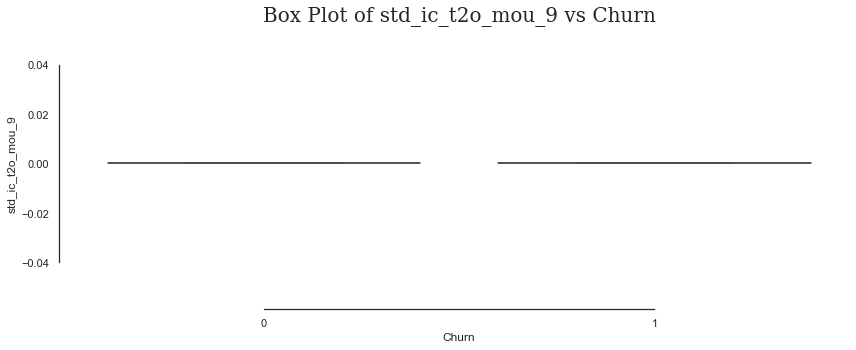

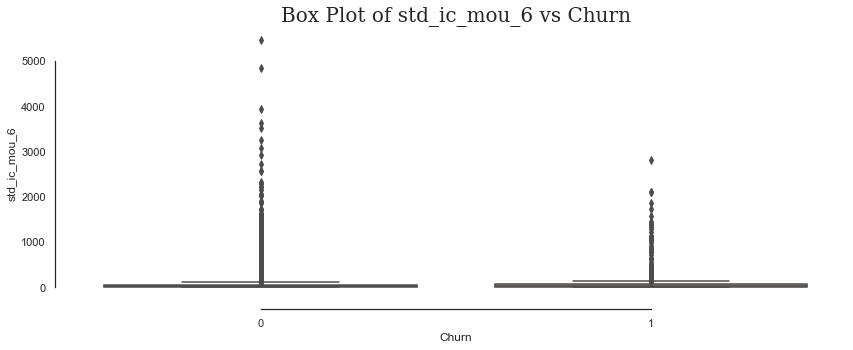

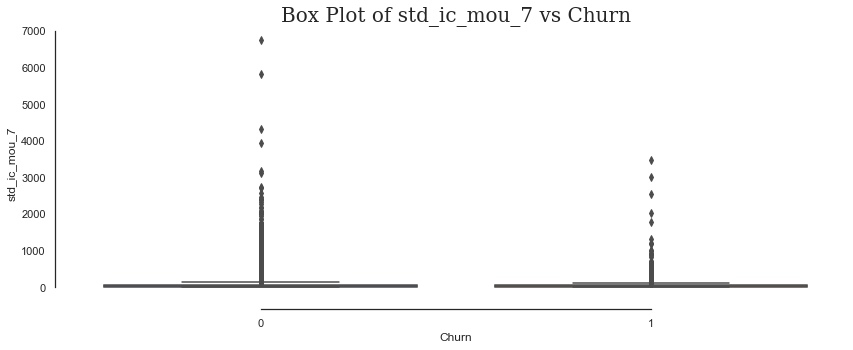

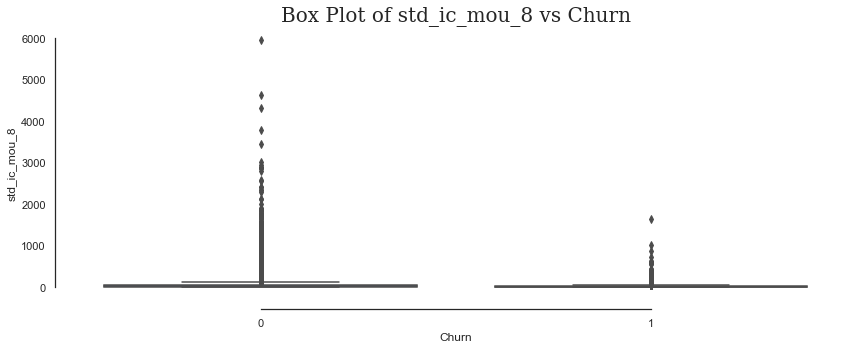

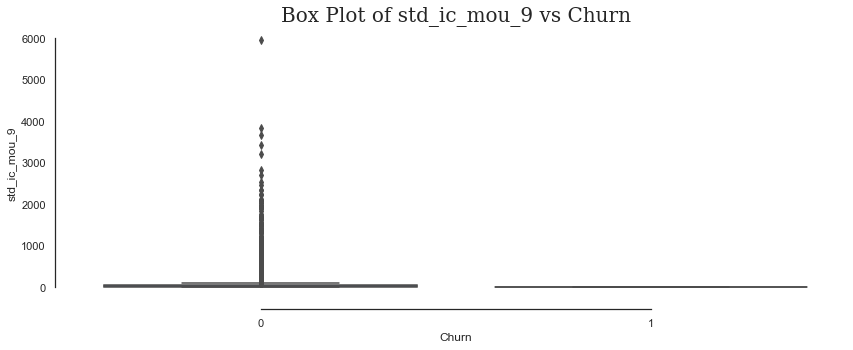

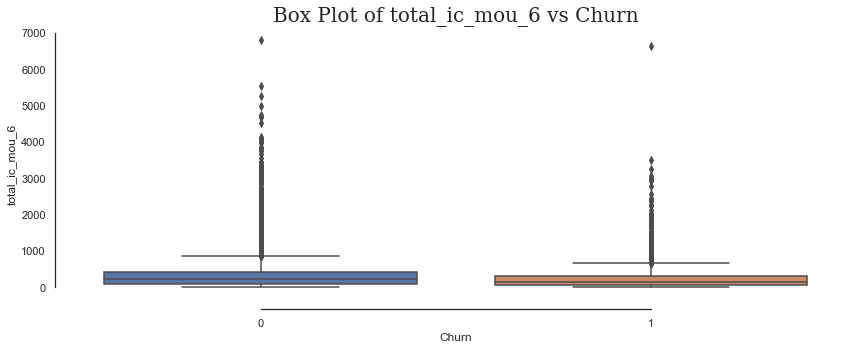

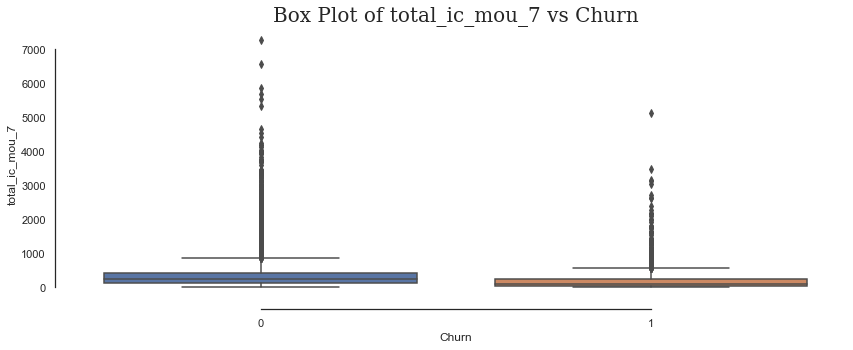

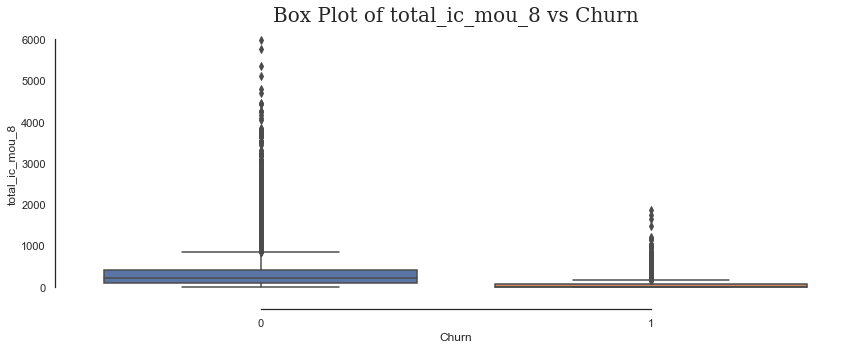

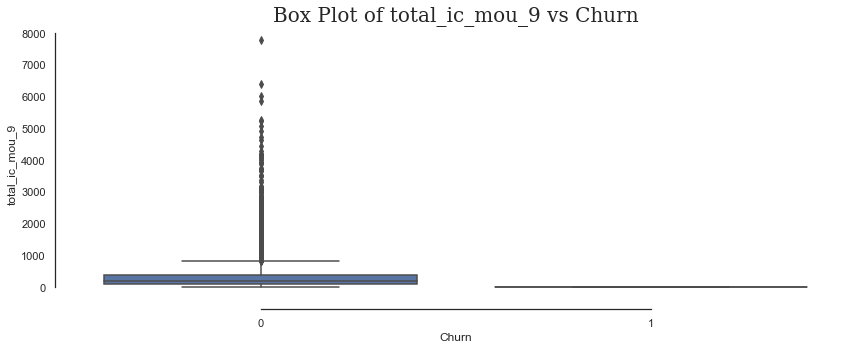

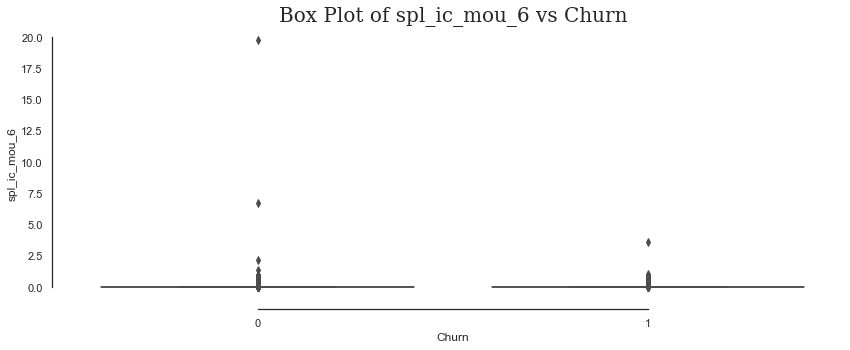

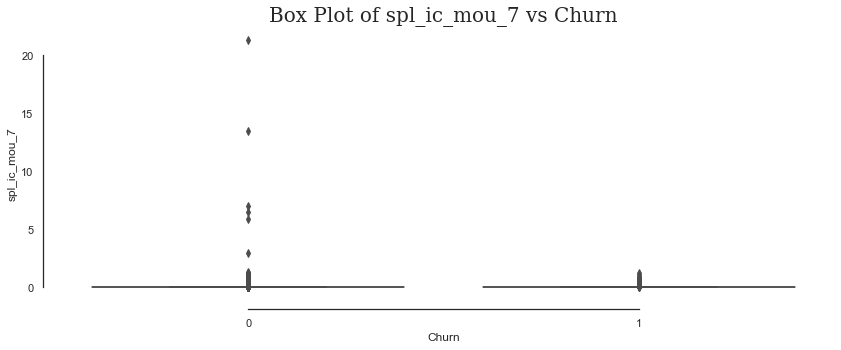

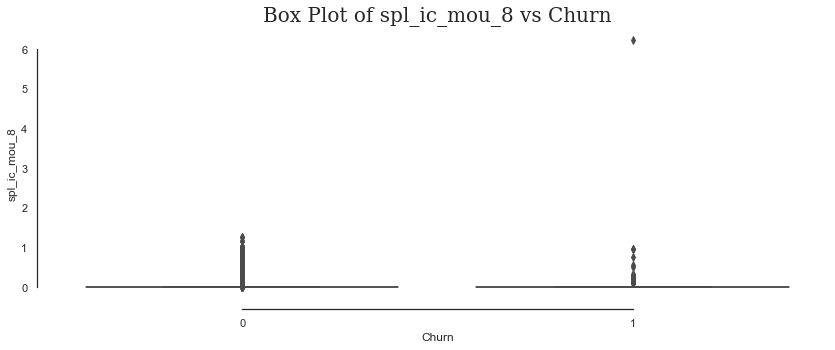

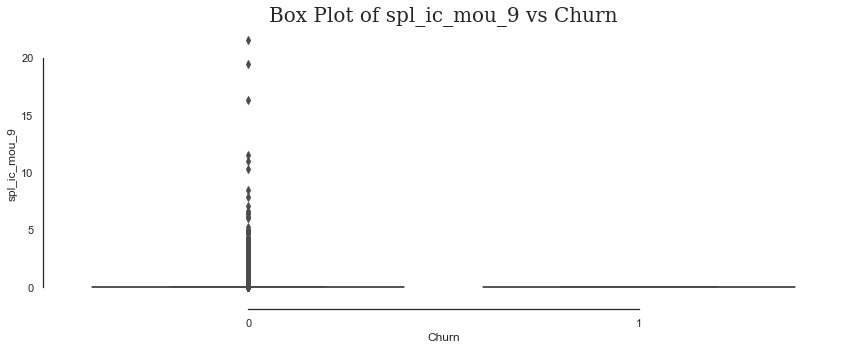

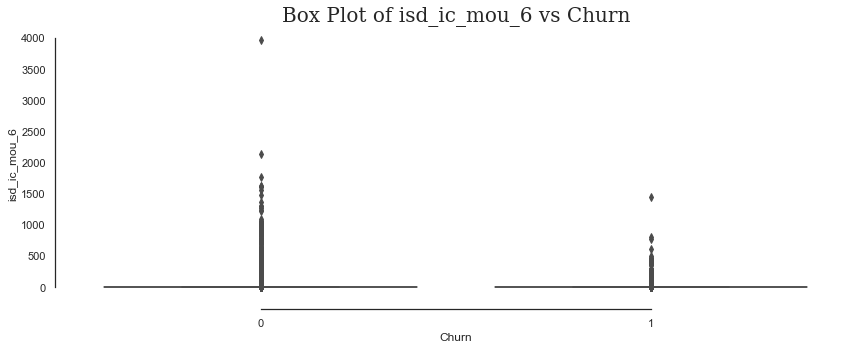

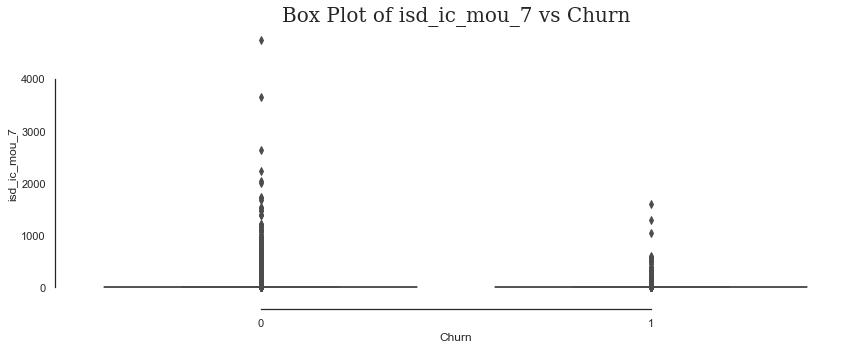

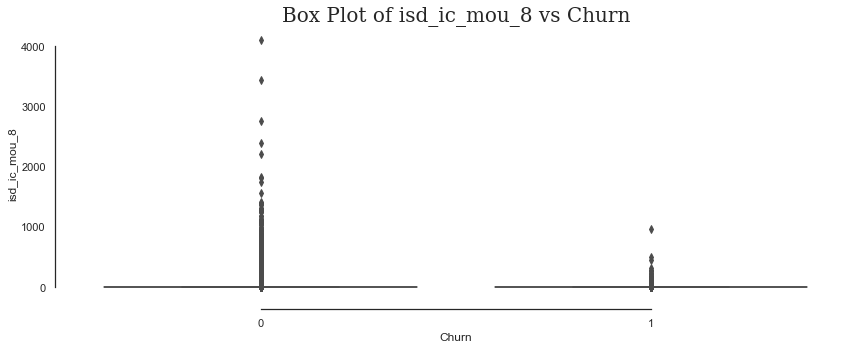

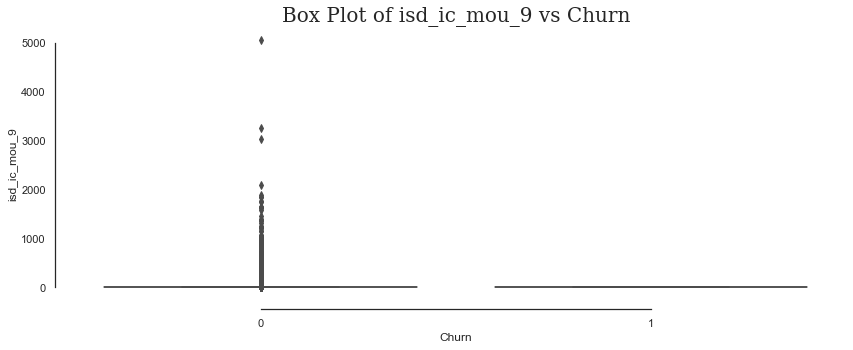

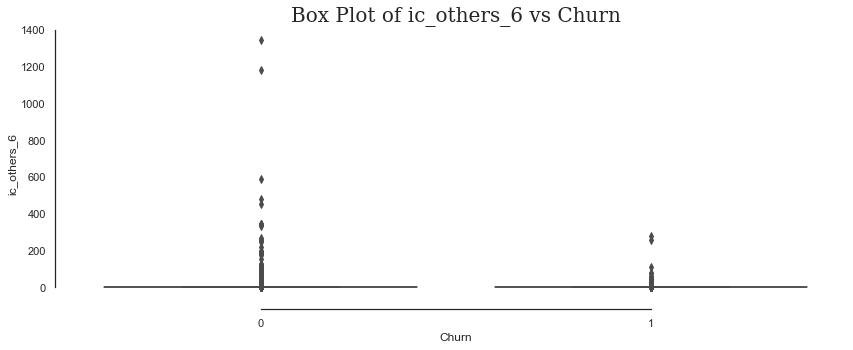

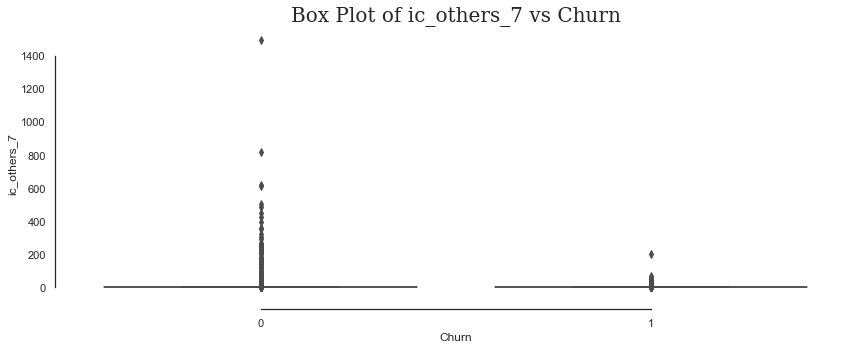

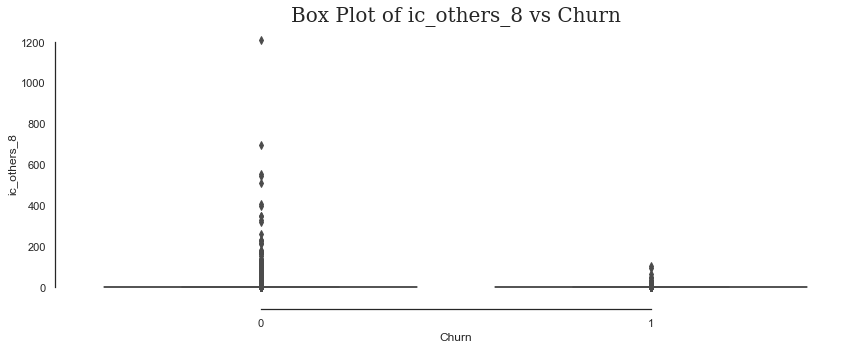

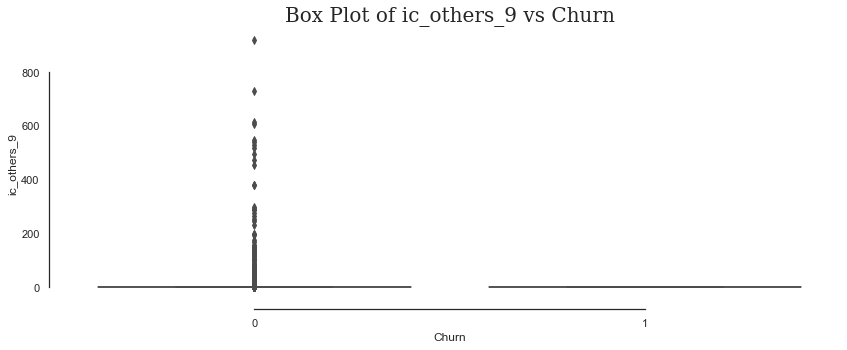

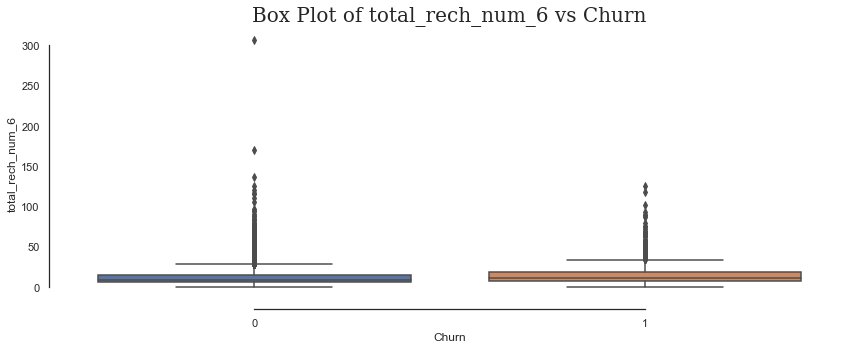

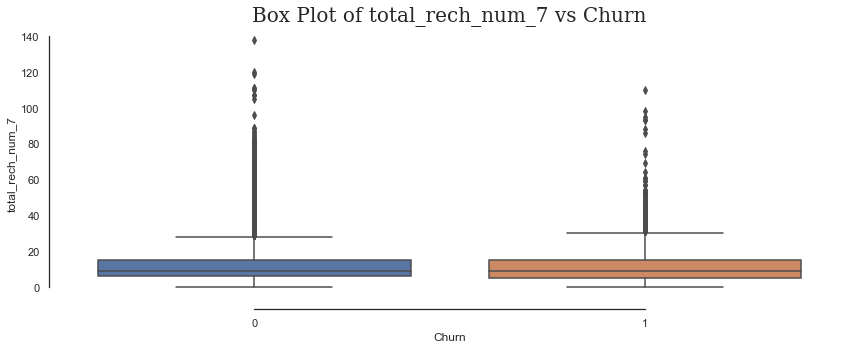

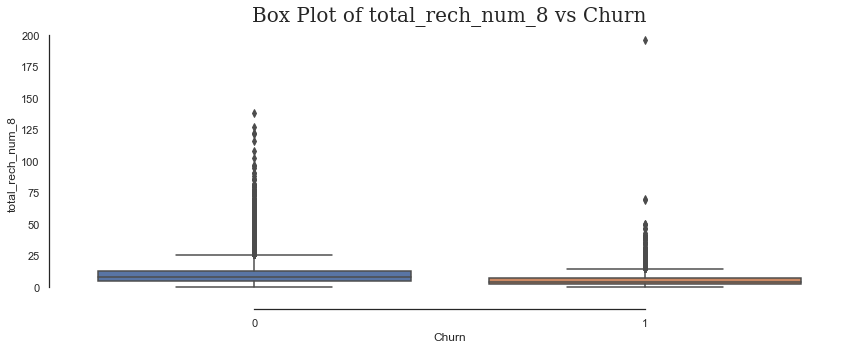

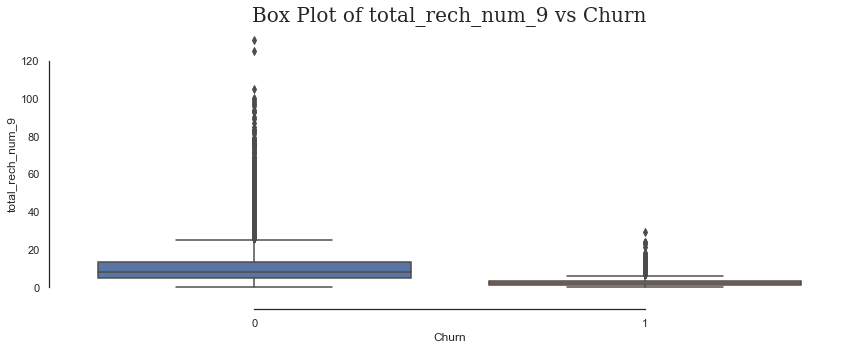

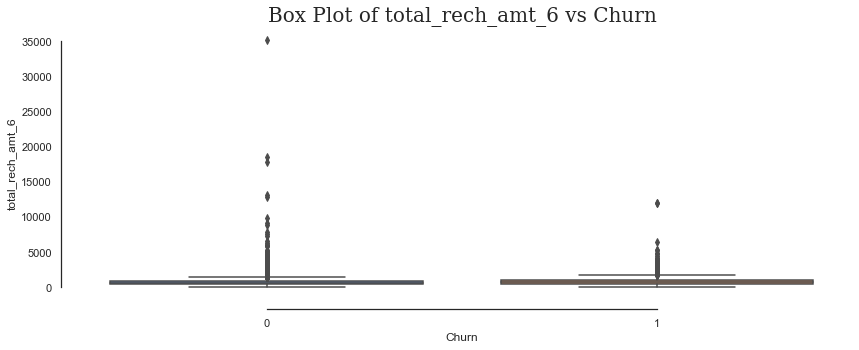

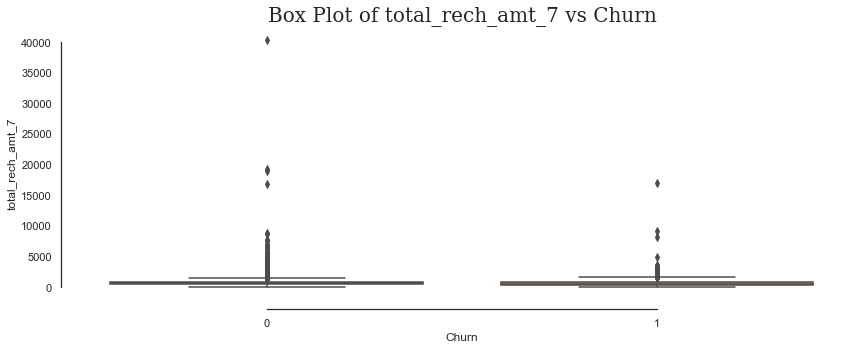

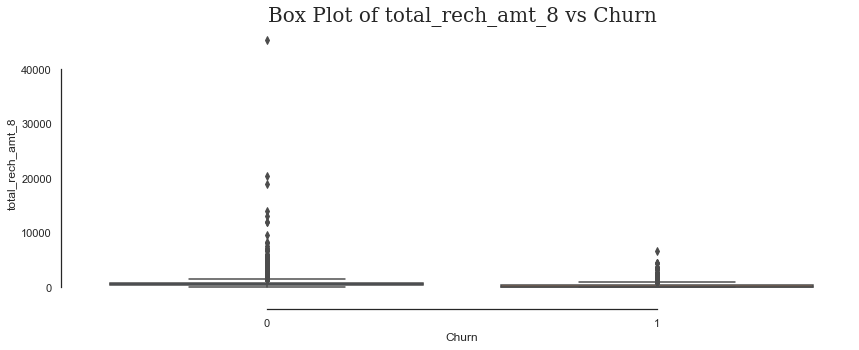

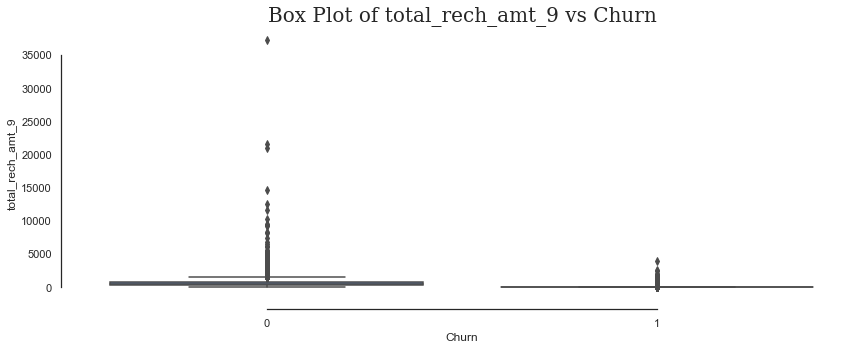

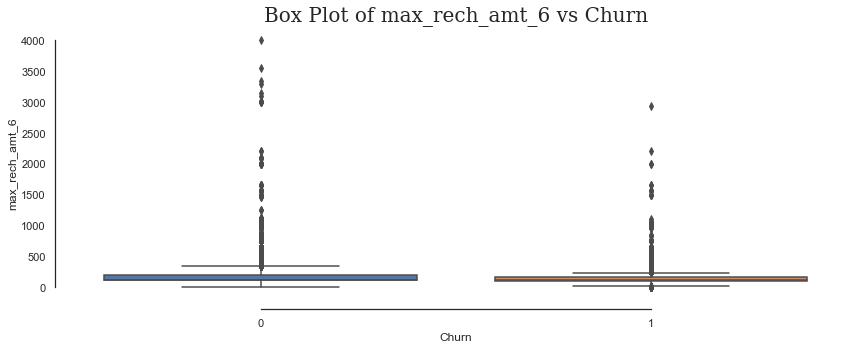

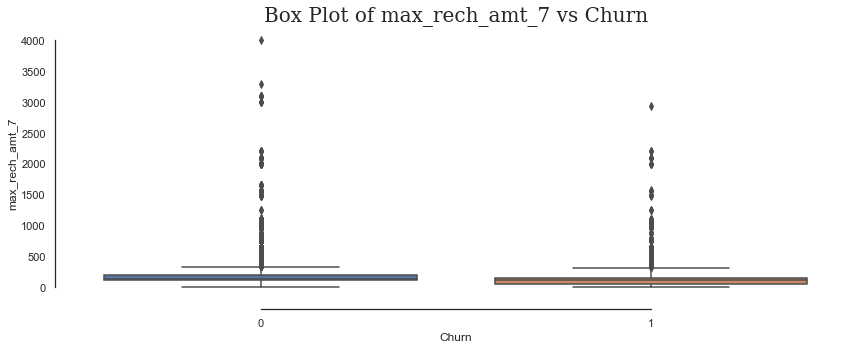

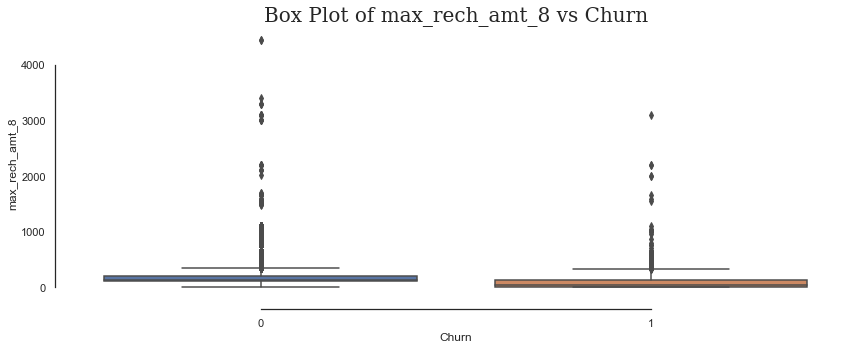

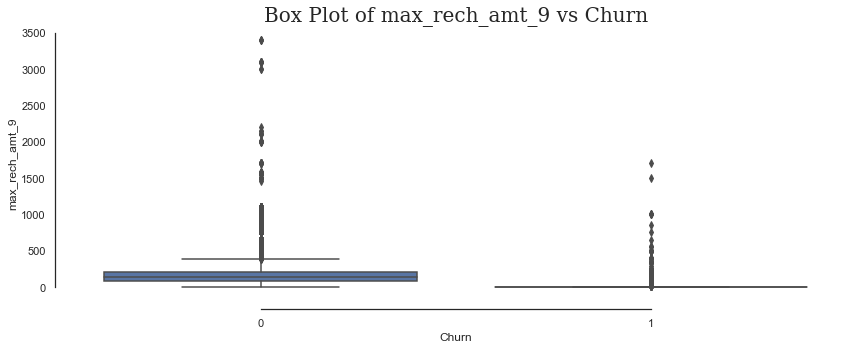

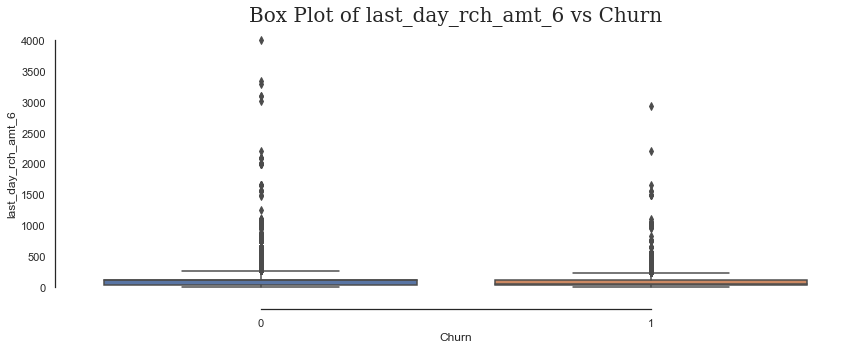

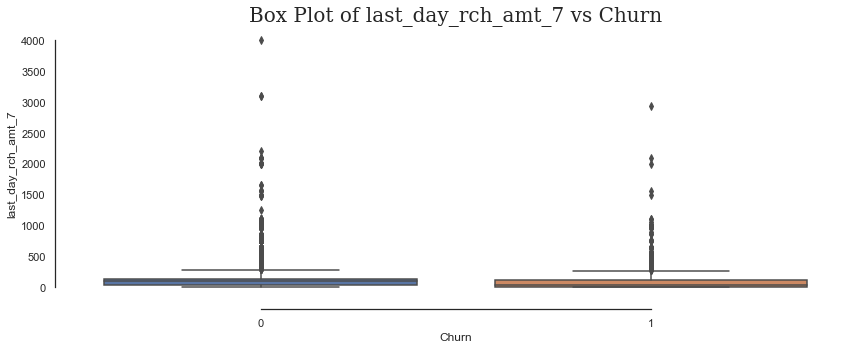

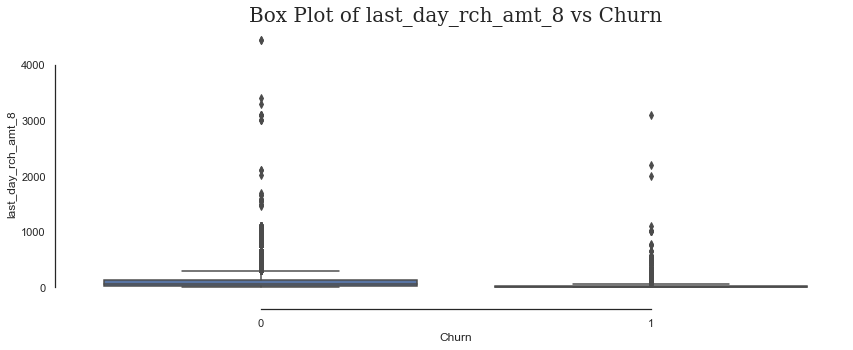

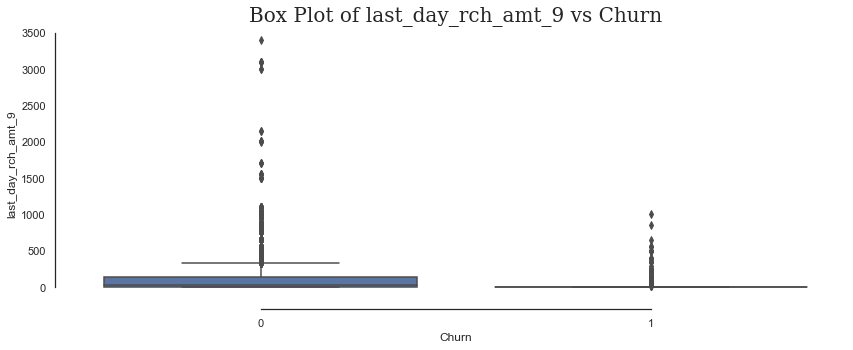

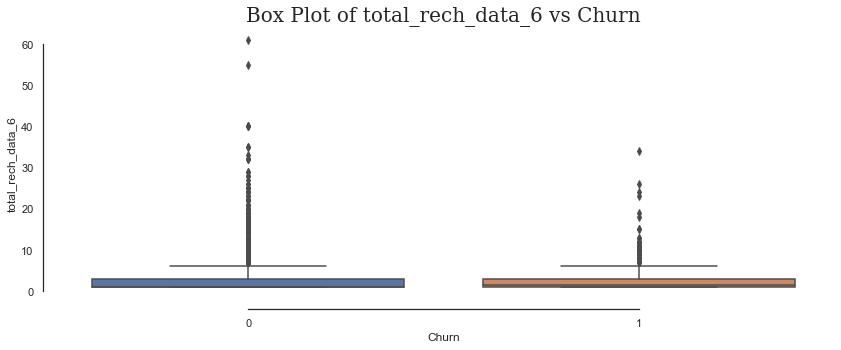

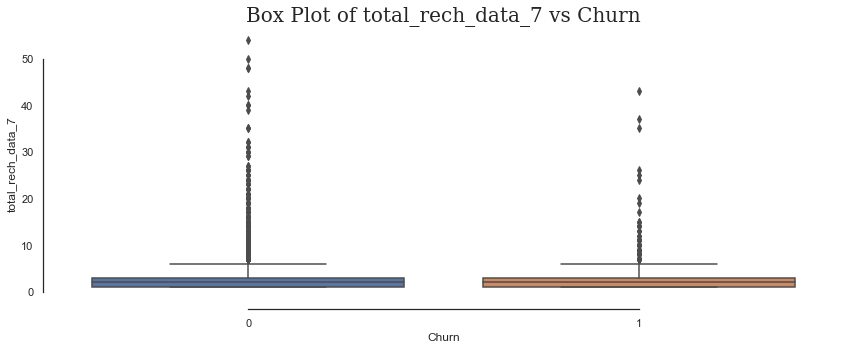

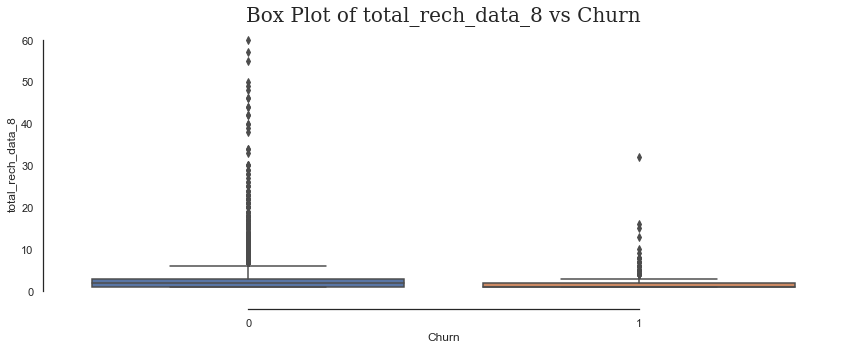

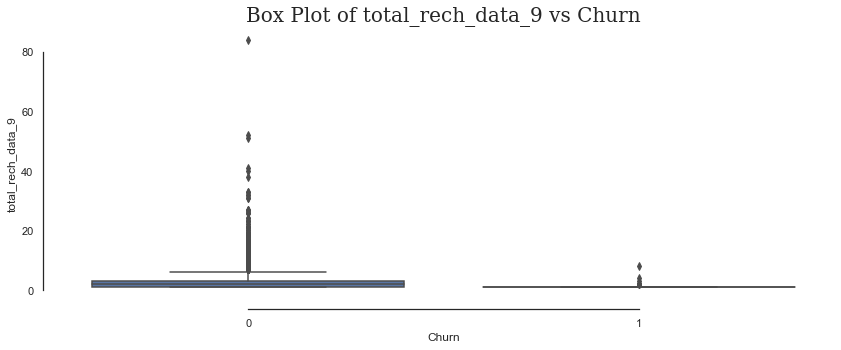

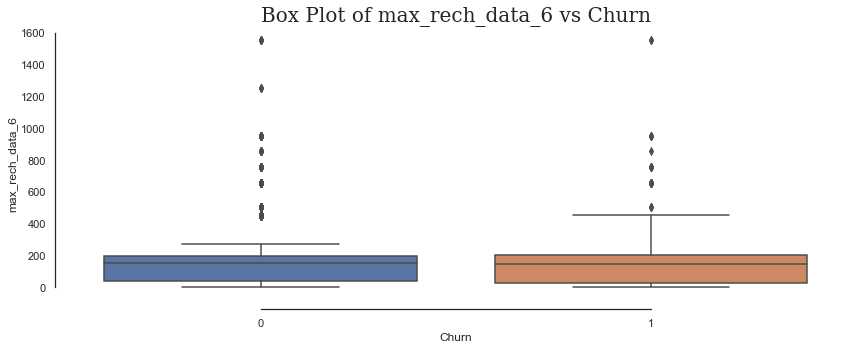

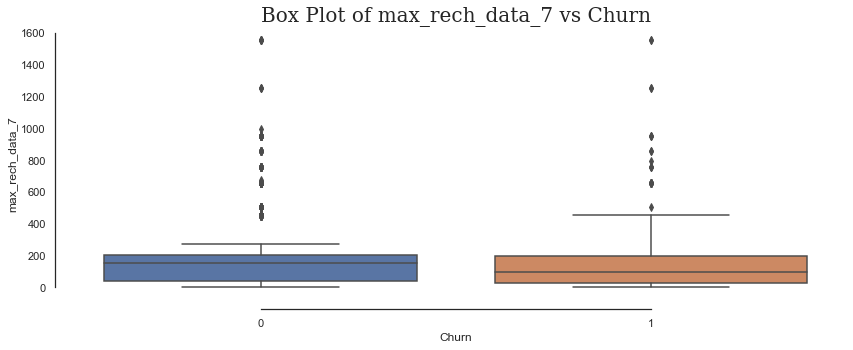

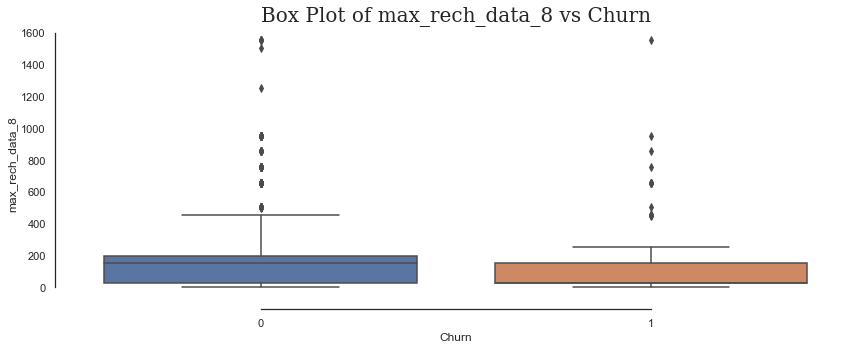

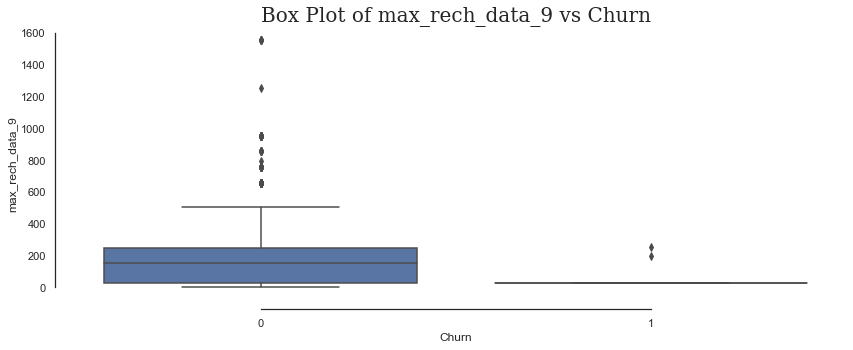

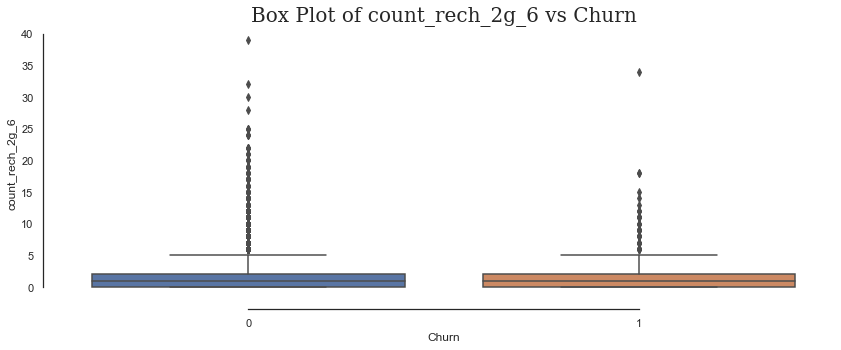

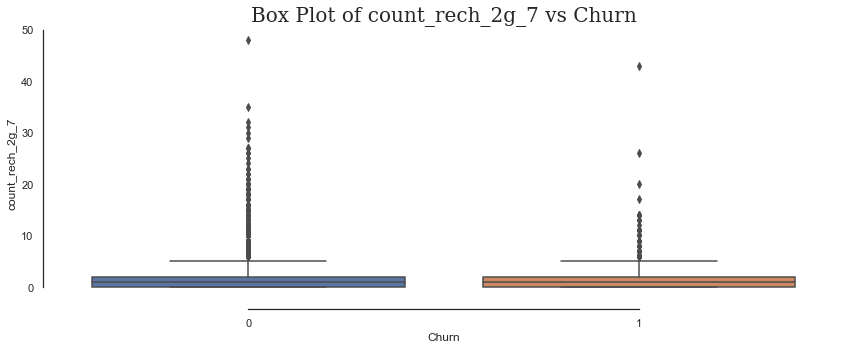

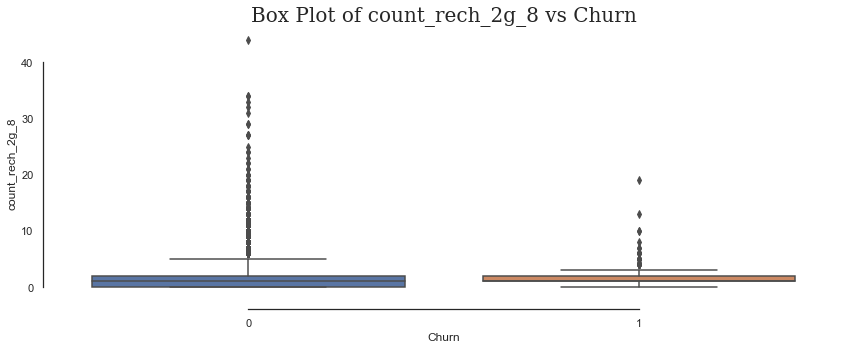

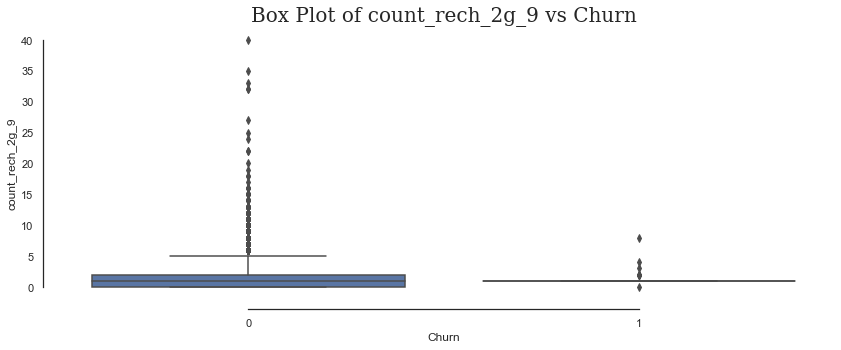

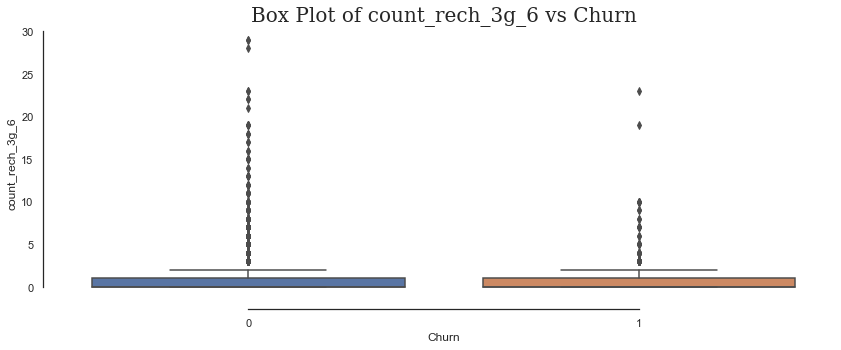

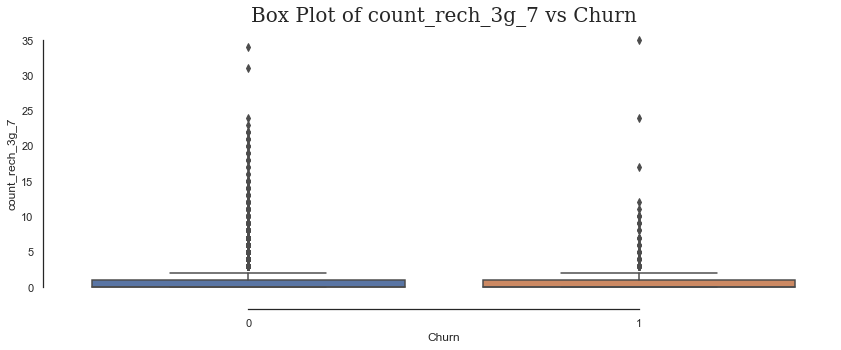

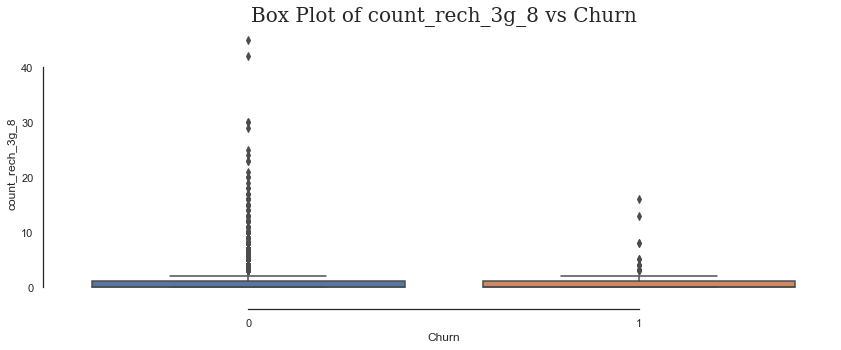

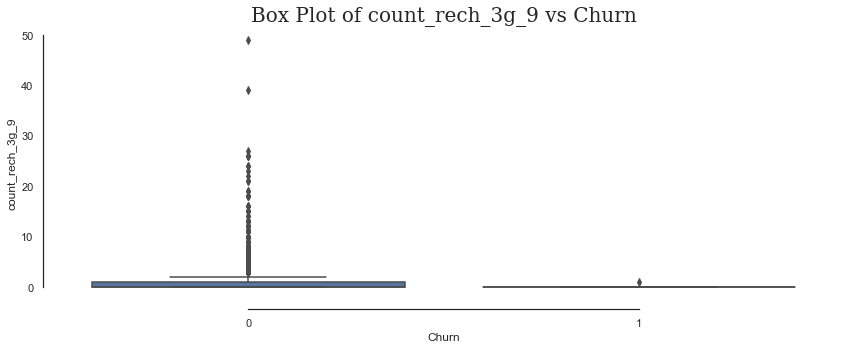

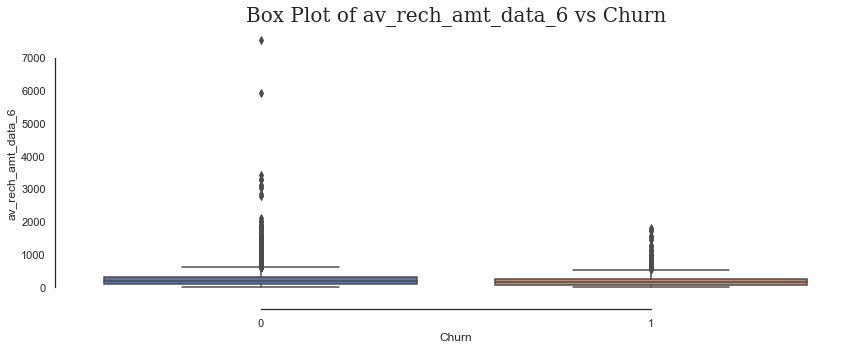

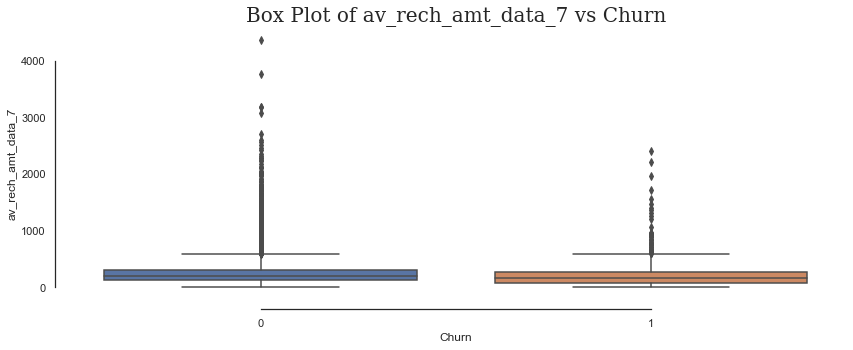

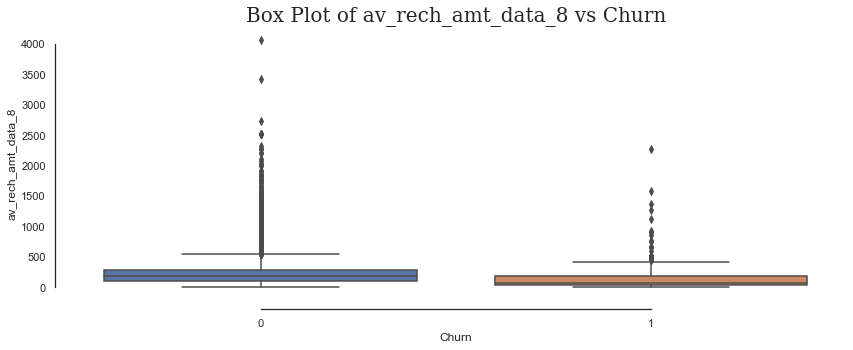

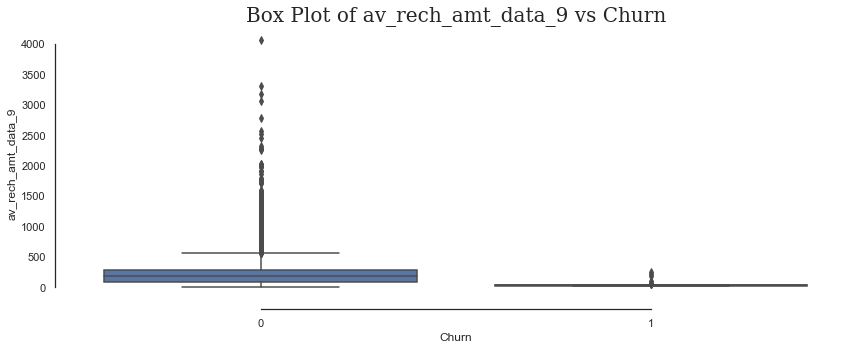

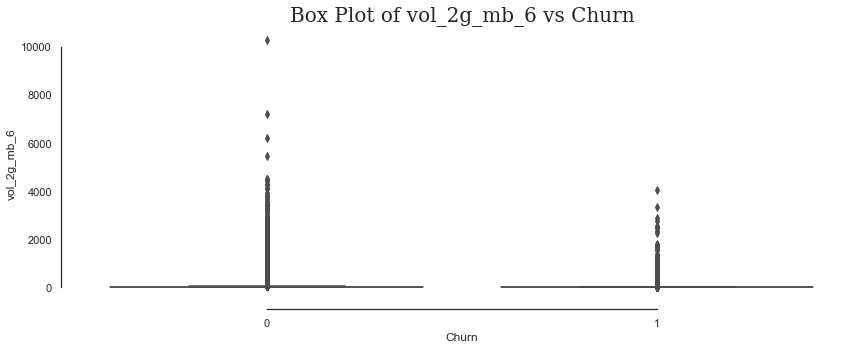

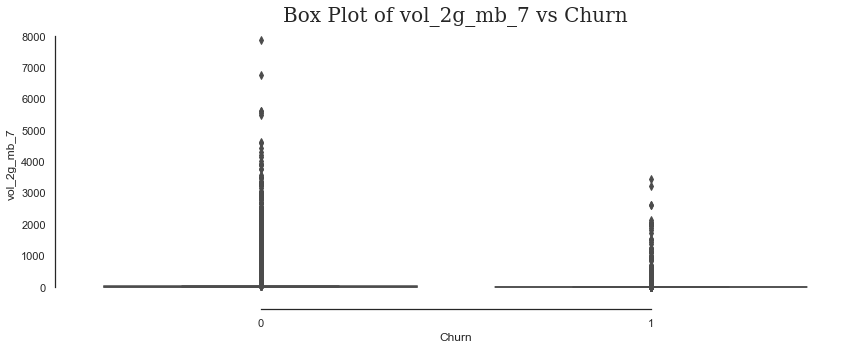

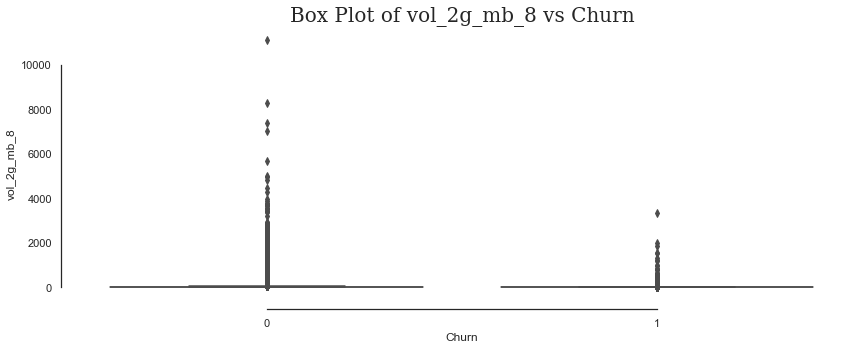

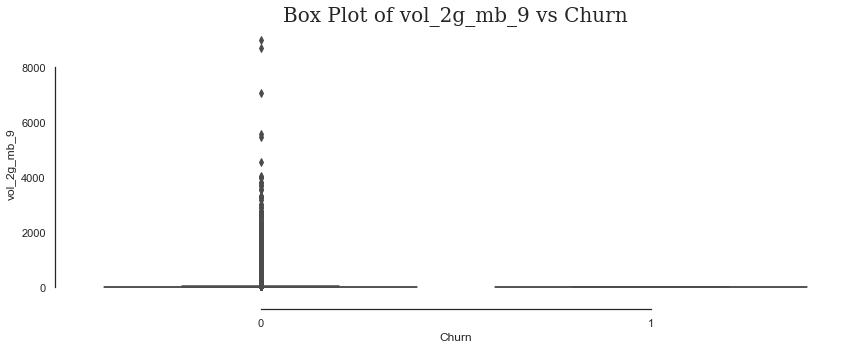

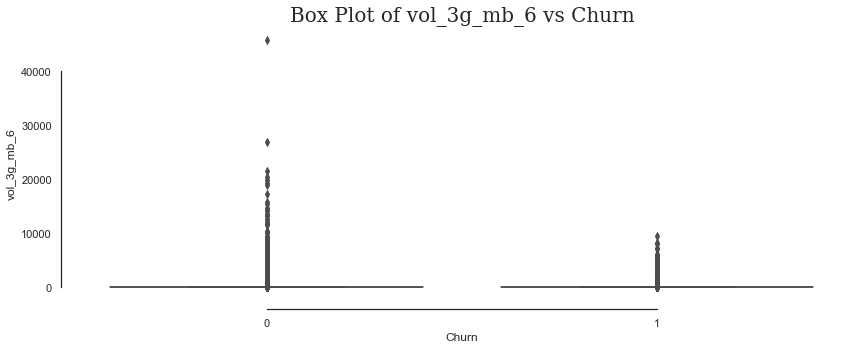

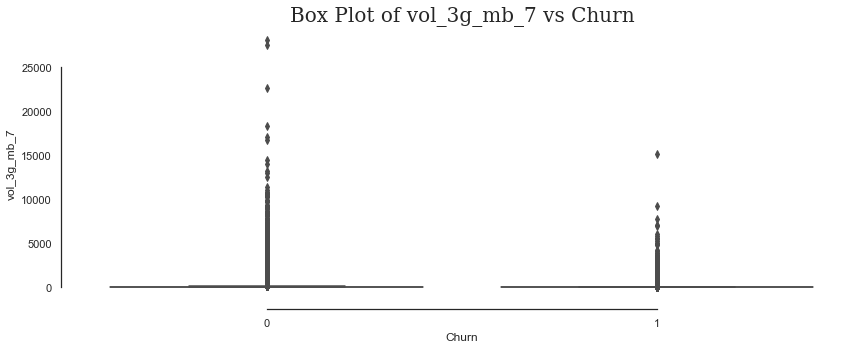

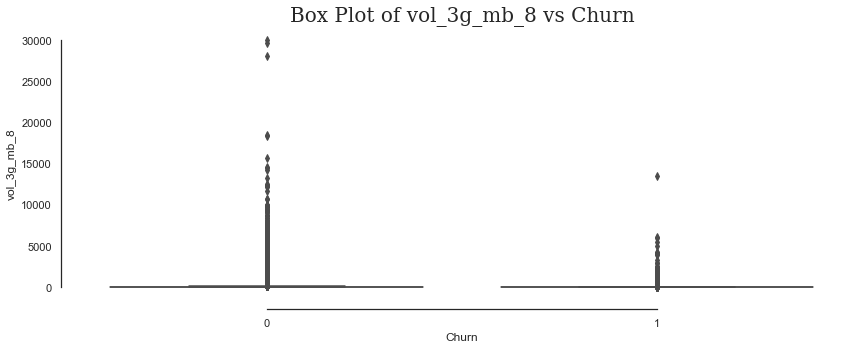

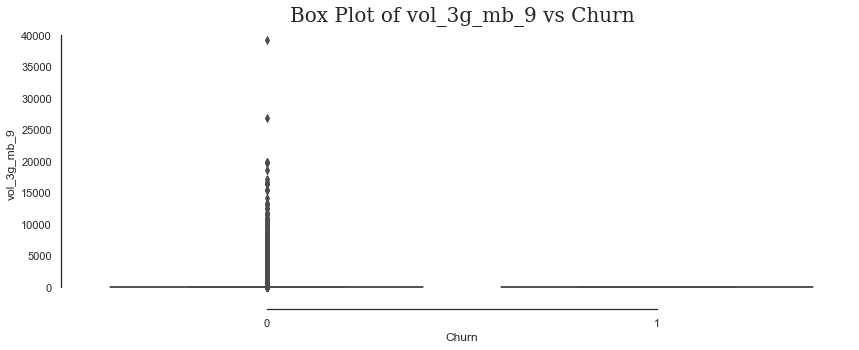

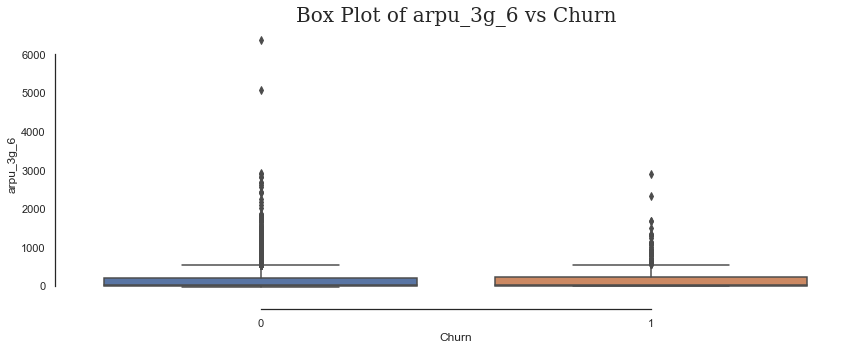

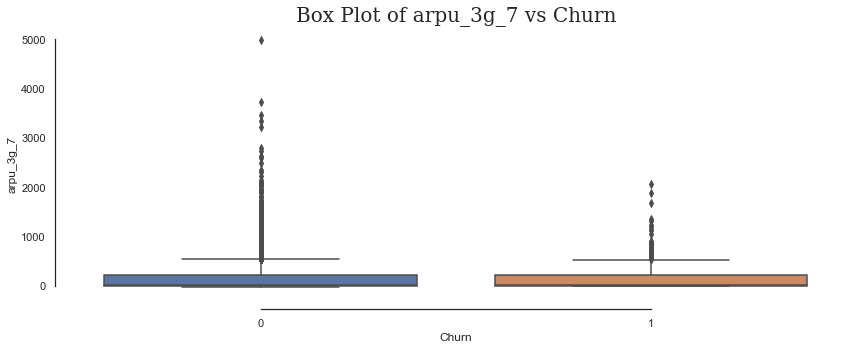

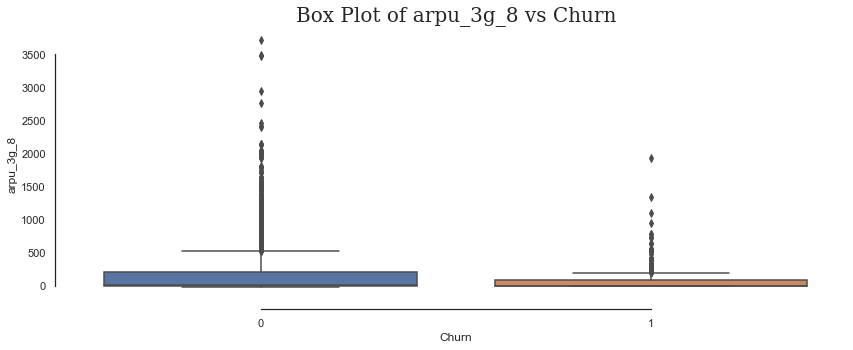

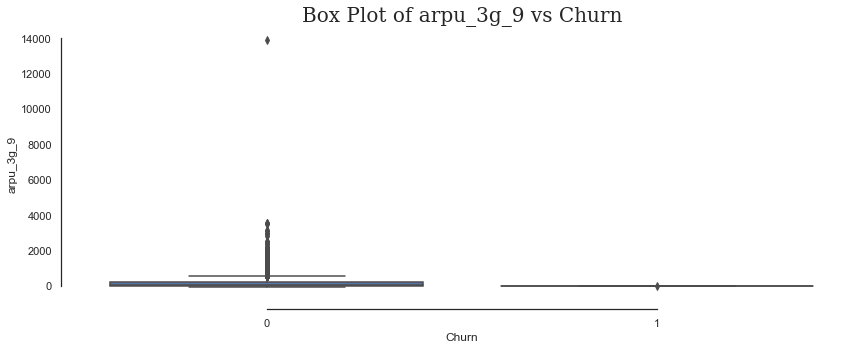

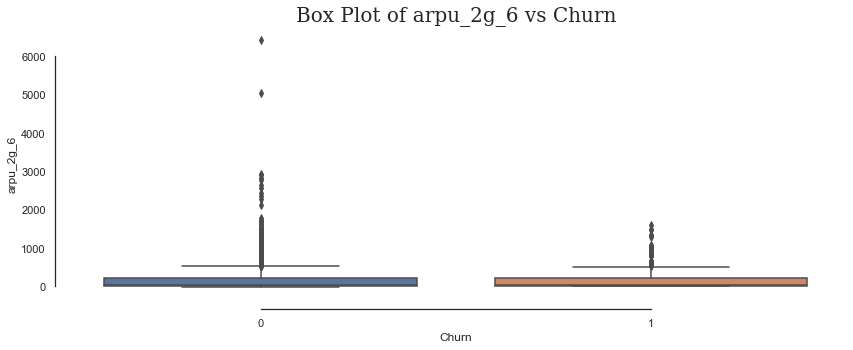

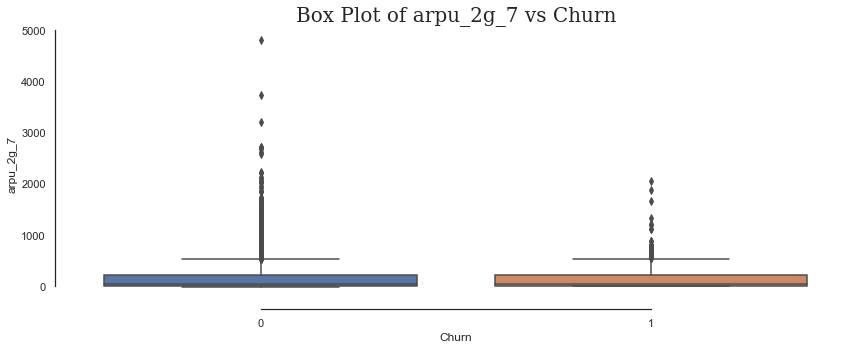

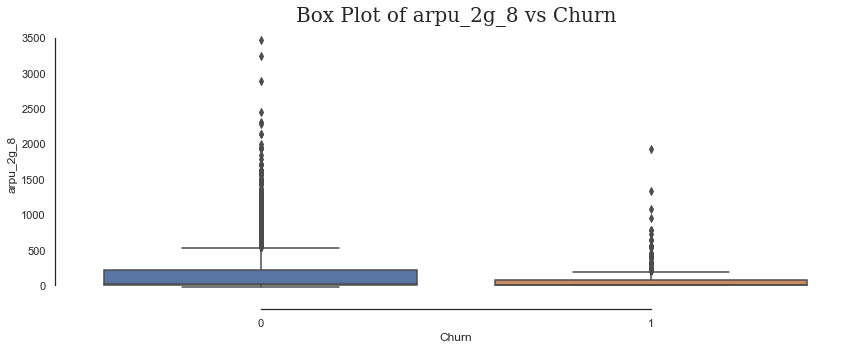

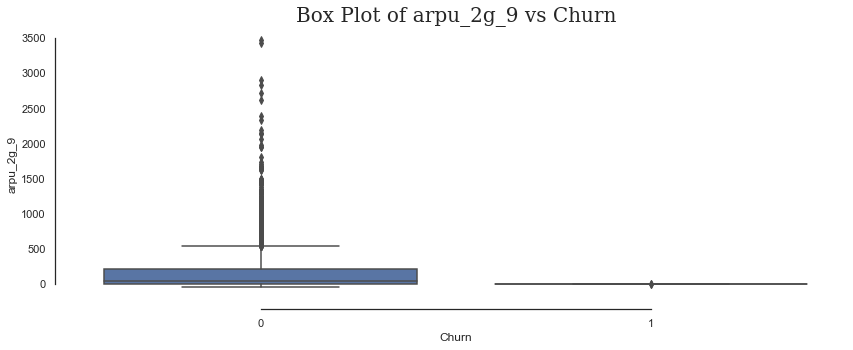

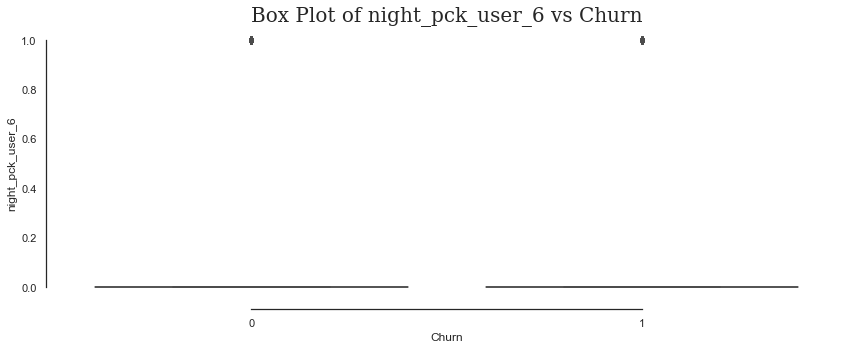

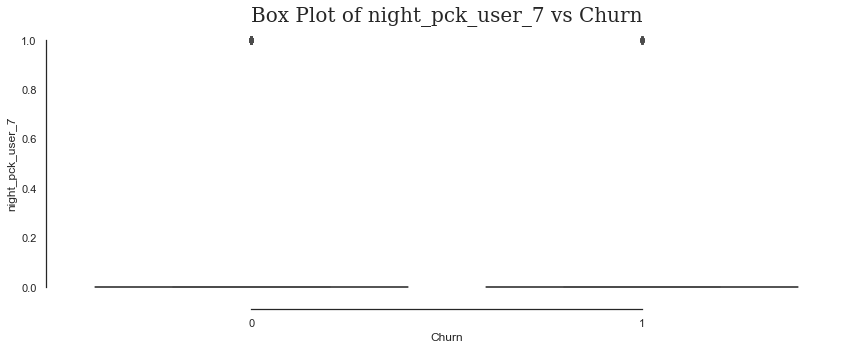

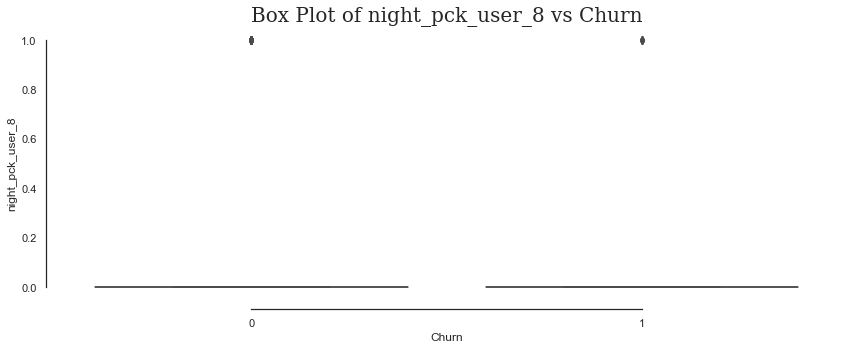

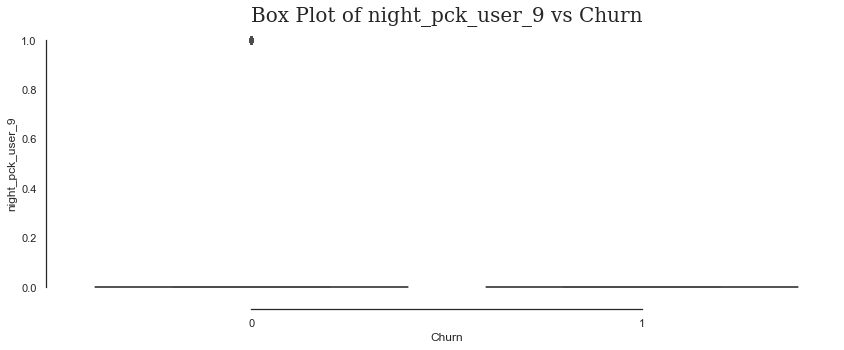

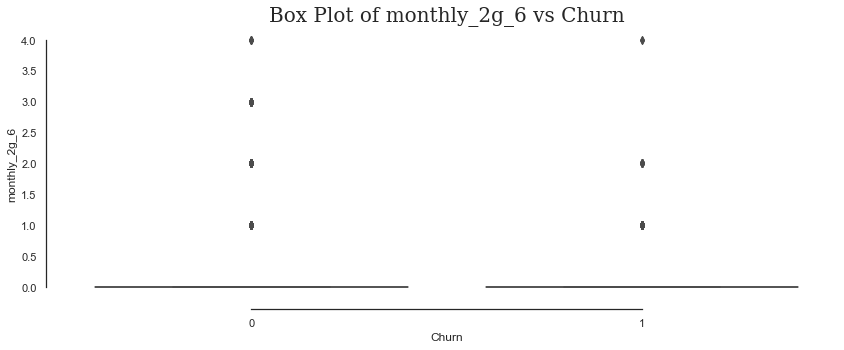

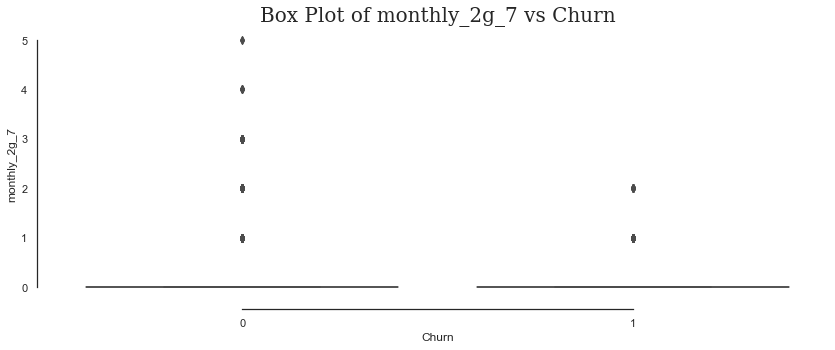

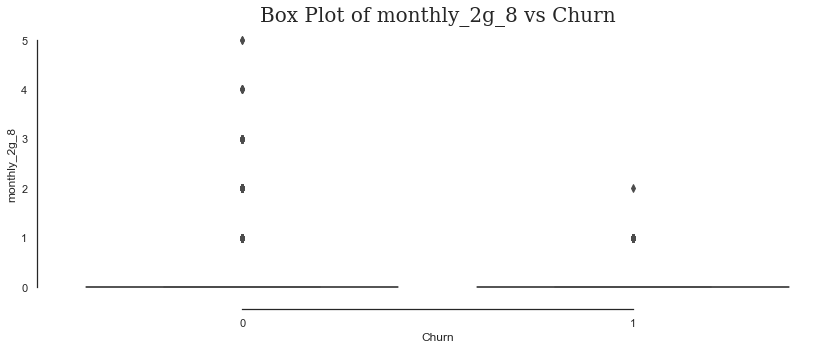

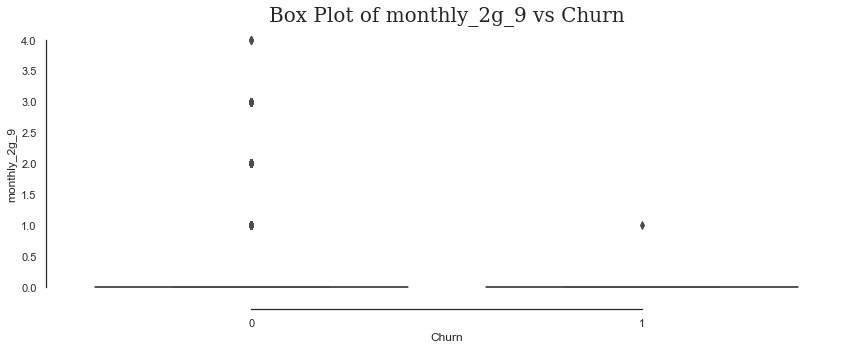

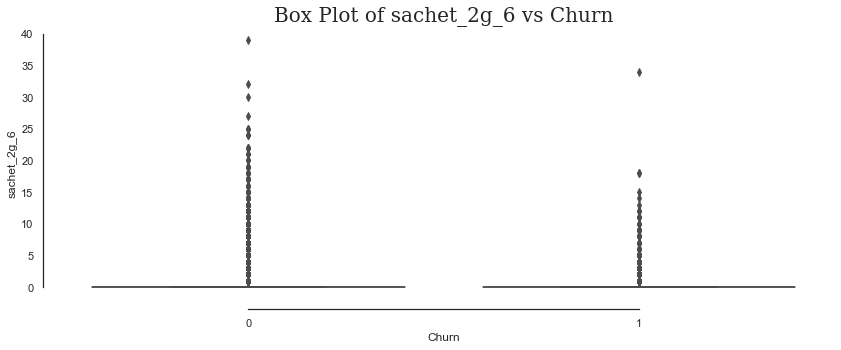

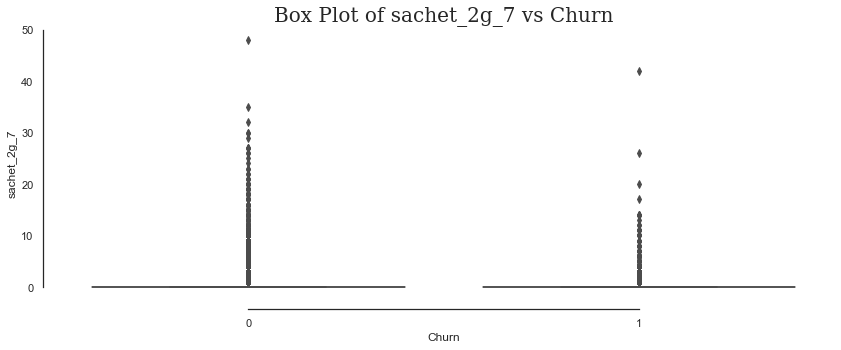

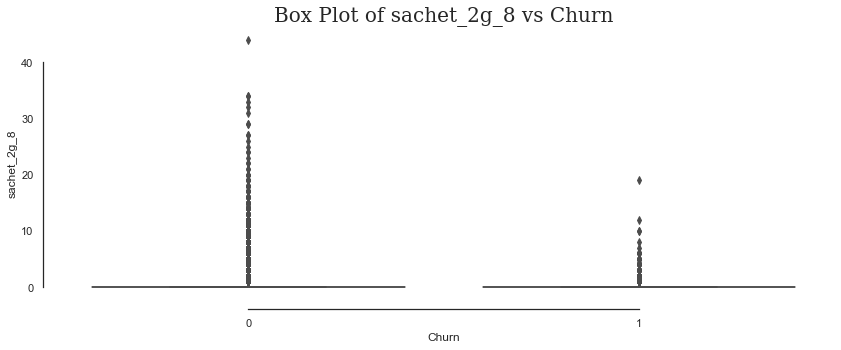

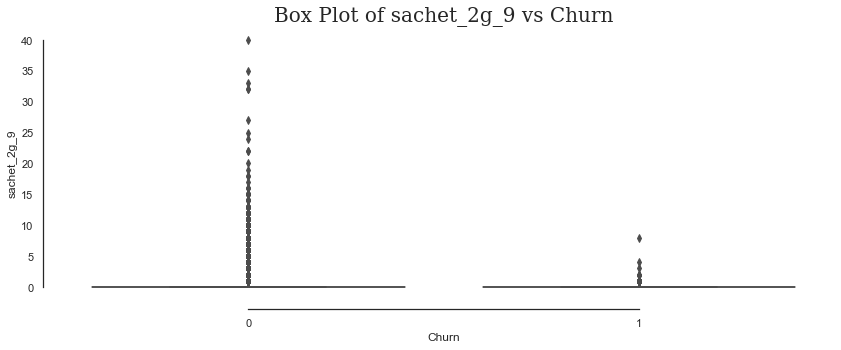

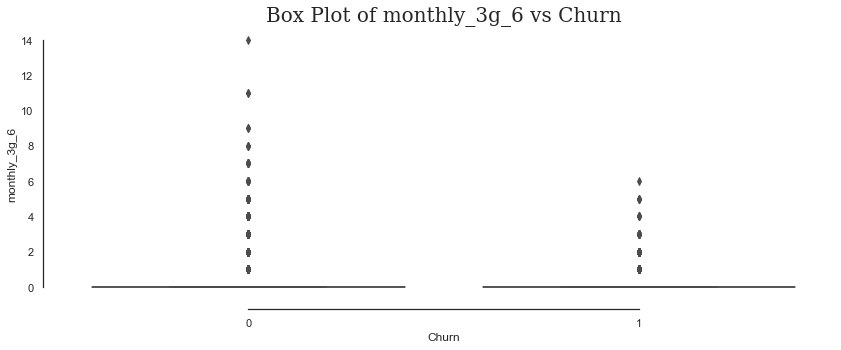

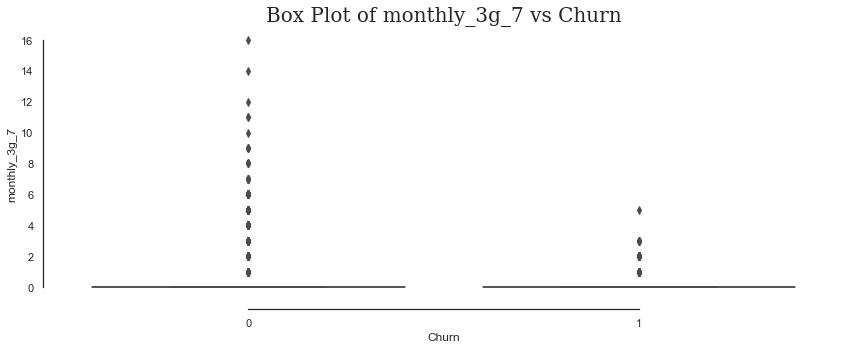

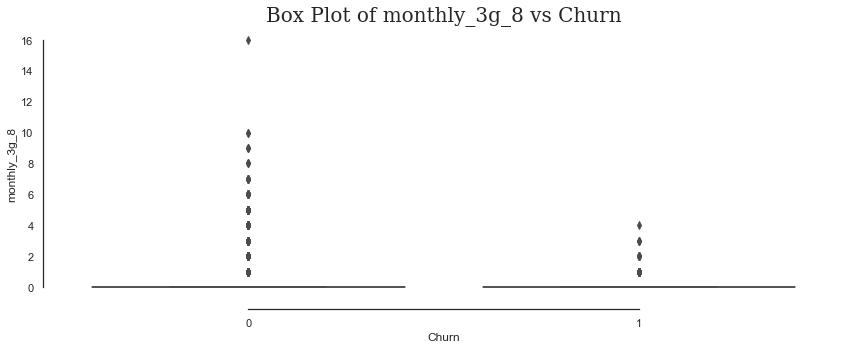

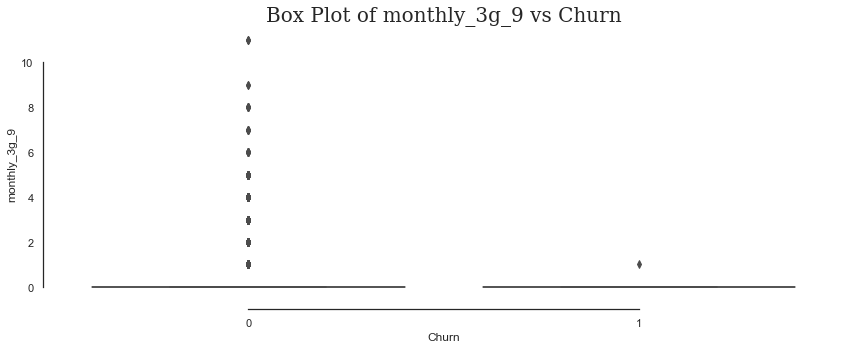

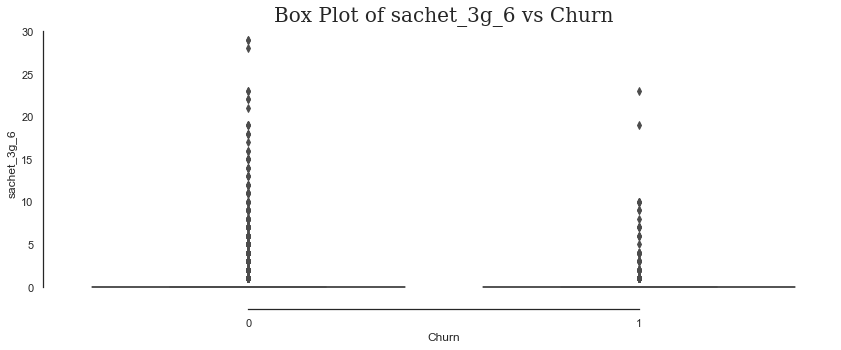

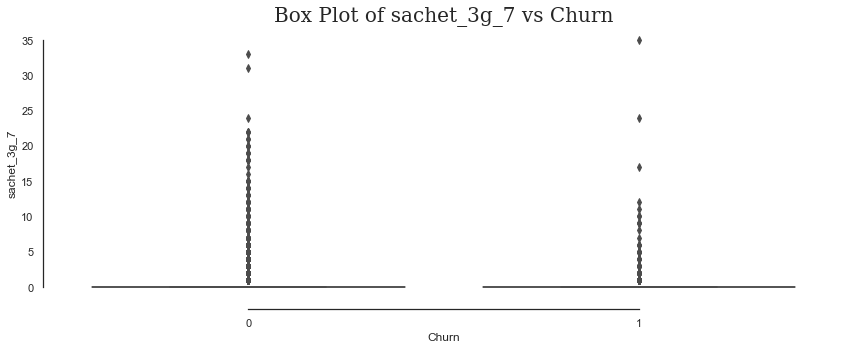

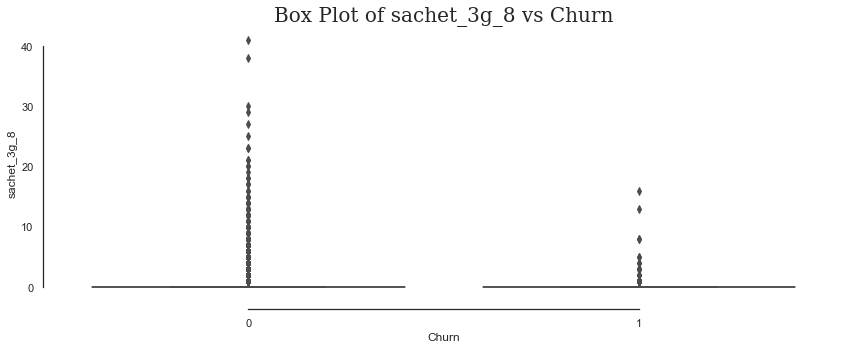

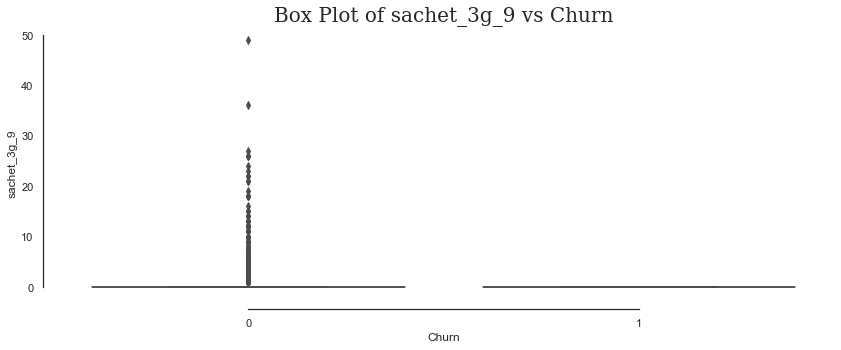

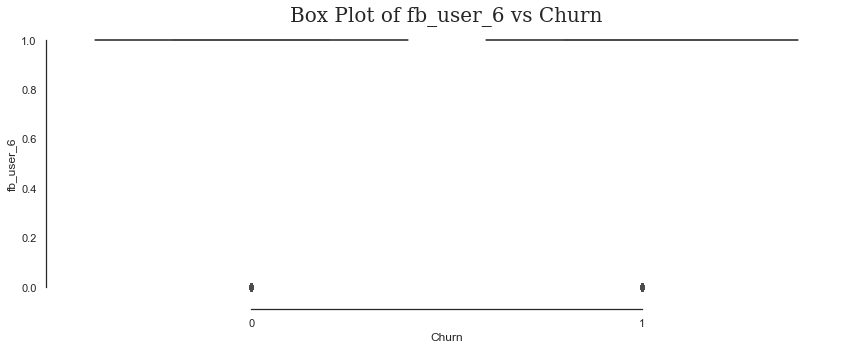

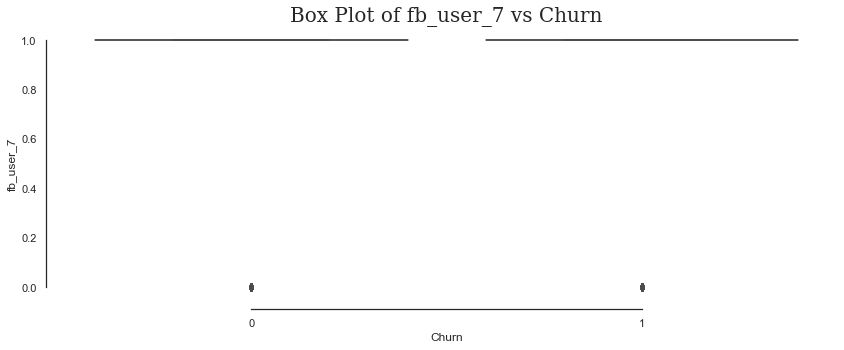

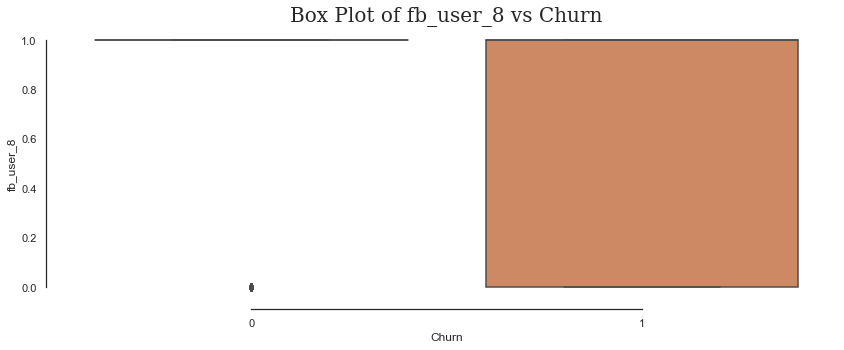

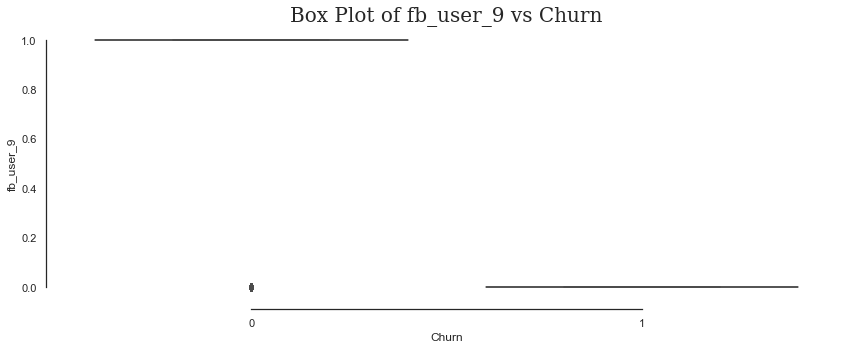

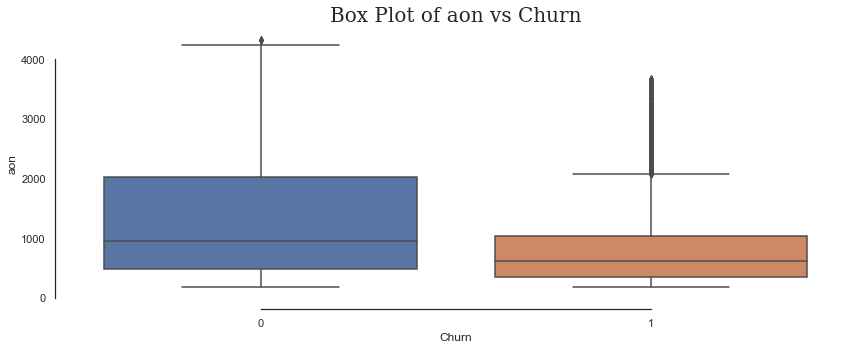

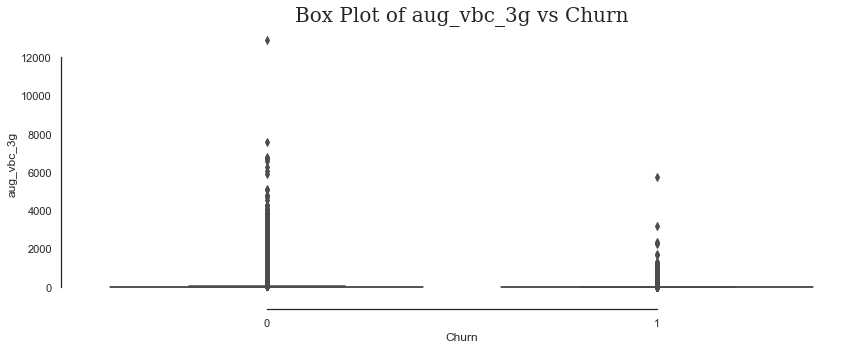

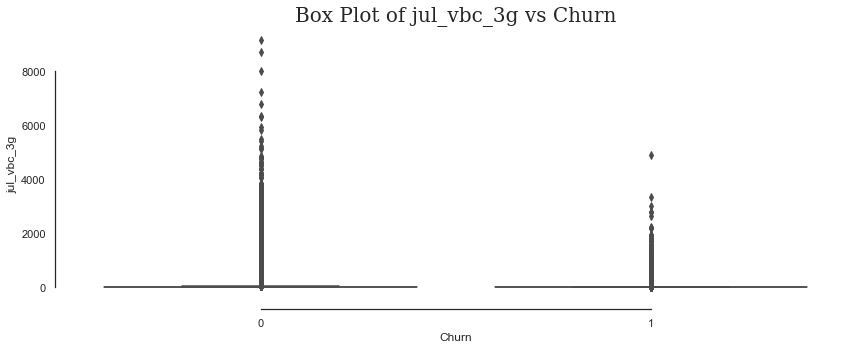

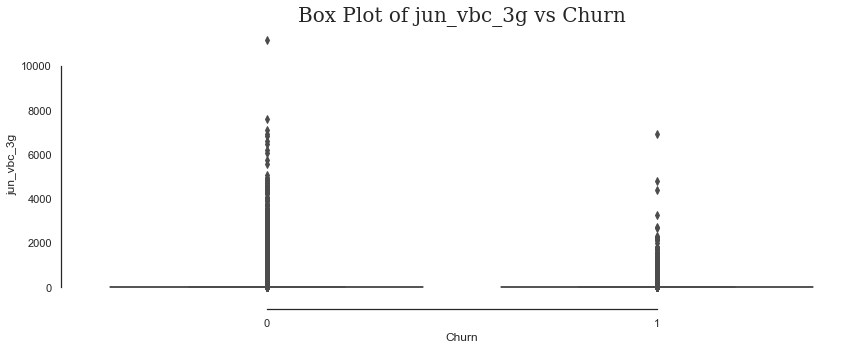

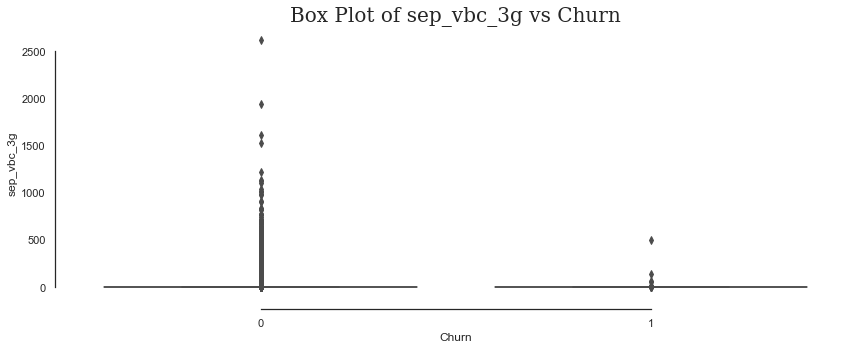

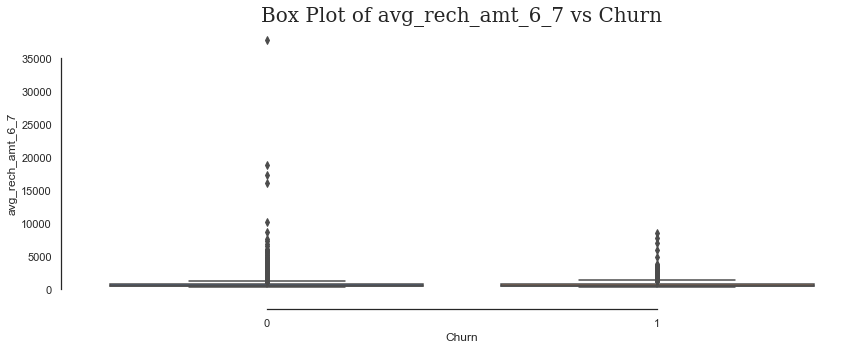

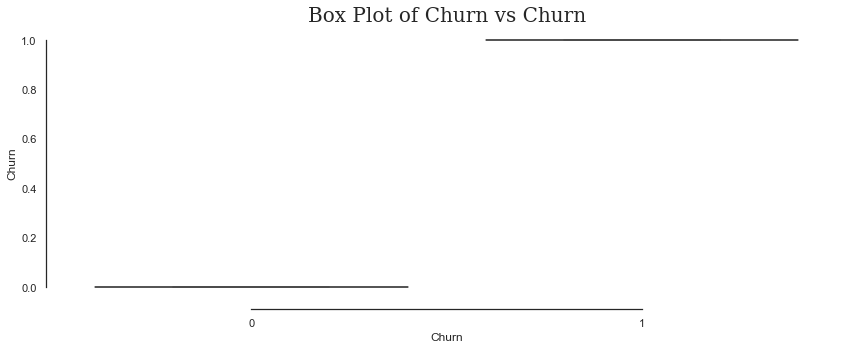

In [70]:
for x in df.select_dtypes(exclude='object').columns:
    box(df[x])

<AxesSubplot:xlabel='aon', ylabel='Density'>

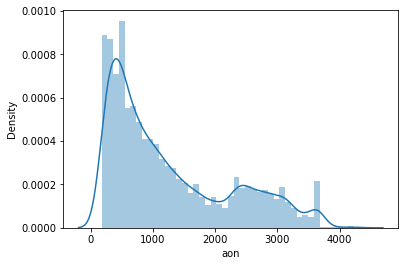

In [31]:
sns.distplot(df.aon)

In [32]:
max(df.aon)

4321

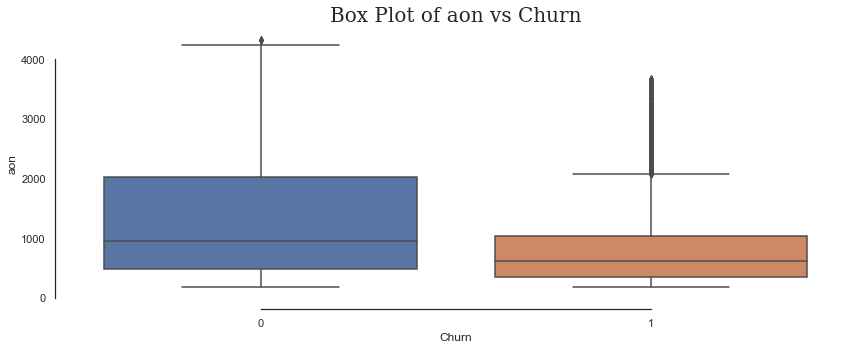

In [74]:
box(df.aon)

In [ ]:
def scatter(x):
    plt.figure(figsize=(12,4))
    plt.title('Scatter Plot of ' + x.name + ' vs ' + 'Churn',fontdict={'size':20,'family': 'serif'})
    sns.scatterplot(x=df['Churn'],y=x)


### Missing Value Treatment

In [ ]:
# (df.isnull().sum()/len(df)*100).sort_values(ascending=False).head(150)

- <b>Dropping columns with more than 70% missing value.

In [ ]:
# df.dropna(thresh=df.shape[0]*0.7,axis=1,inplace=True)

- <b> Filling rest of the categorical & numerical columns with mode & median respectively.

In [ ]:
# cat_col = df.select_dtypes(include='object').columns
# df[cat_col].isna().sum()/len(df)

In [ ]:
# to_drop

In [ ]:
# #categorical columns
# cat_col = df.select_dtypes(include='object').columns

# df[cat_col] = df[cat_col].fillna(df[cat_col].mode().iloc[0])


In [ ]:
# df[cat_col].isna().sum()

In [ ]:
# #numericals
# df = df.fillna(df.median().iloc[0])

In [ ]:
# true=((df.isnull().sum()/len(df)*100).sort_values(ascending=False)>1)
# num_missing = true.loc[true.values==True].index
# df[num_missing].describe()

In [ ]:
# df.isna().sum().sort_values(ascending=False).head()

In [ ]:
# df[cat_col] = df[cat_col].apply(lambda x : pd.to_datetime(x,format="%m/%d/%Y"))

In [ ]:
# def ismissing():
#     for i in range(6,10):
#         print(i)
#         count2 = 'count_rech_2g_{}'.format(str(i))
#         count3 = 'count_rech_3g_{}'.format(str(i))
#         date = 'date_of_last_rech_data_{}'.format(str(i))
#         avg = 'av_rech_amt_data_{}'.format(str(i))
#         total = 'total_rech_data_{}'.format(str(i))
        
#         print(df[count2].isnull().sum())
#         print(df[count3].isnull().sum())
#         print(df[date].isnull().sum())
#         print(df[avg].isnull().sum())
#         print(df[total].isnull().sum())

In [ ]:
# def uni_cat_plot(var):
    
#     sns.set_theme(style="whitegrid",palette='Paired')
    
#     fig,axes = plt.subplots(1,2,figsize=(14,7))
    
    
#     #df_0
#     sns.countplot(x=var , data=df_0 , ax=axes[0])
#     axes[0].set_title('Clients without payment difficulties',fontsize=16)
#     axes[0].set_ylabel('Count')
#     axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    
#     for p in axes[0].patches:
#         percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_0))
#         x = p.get_x() + p.get_width()
#         y = p.get_height()
#         axes[0].annotate(percentage, (x, y),ha='center')
    
    
    
#     #df_1
#     sns.countplot(x=var , data=df_1 , ax=axes[1])
#     axes[1].set_title('Clients with payment difficulties',fontsize=16)
#     axes[1].set_ylabel('Count')
#     axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    
#     for p in axes[1].patches:
#         percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_1))
#         x = p.get_x() + p.get_width()
#         y = p.get_height()
#         axes[1].annotate(percentage, (x, y),ha='center')
    
#     plt.tight_layout()
#     plt.show()